Посмотрим на каждый из 3-х файлов

In [1]:
import pandas as pd

In [2]:
# файл с пользователями

df_users = pd.read_csv('users.csv')
df_users.head()

,user_id,age,sex
0,1,45_54,NaN
1,2,18_24,0.0
2,3,65_inf,0.0
3,4,18_24,0.0
4,5,35_44,0.0


In [3]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142888 entries, 0 to 142887
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  142888 non-null  int64  
 1   age      142742 non-null  object 
 2   sex      136626 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ MB


In [4]:
# файл с книгами

df_items = pd.read_csv('items.csv')
df_items.head()

,id,title,genres,authors,year
0,128115,Ворон-челобитчик,"Зарубежные детские книги,Сказки,Зарубежная кла...",Михаил Салтыков-Щедрин,1886
1,210979,Скрипка Ротшильда,"Классическая проза,Литература 19 века,Русская ...",Антон Чехов,1894
2,95632,Испорченные дети,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1869
3,247906,Странный человек,"Пьесы и драматургия,Литература 19 века",Михаил Лермонтов,1831
4,294280,Господа ташкентцы,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1873


In [5]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59599 entries, 0 to 59598
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       59599 non-null  int64 
 1   title    59599 non-null  object
 2   genres   59568 non-null  object
 3   authors  52714 non-null  object
 4   year     46720 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.3+ MB


In [6]:
# файл с взаимодействием (прочитанные пользователями книги)

df_reading = pd.read_csv('interactions.csv')
df_reading.head()

,user_id,item_id,progress,rating,start_date
0,126706,14433,80,NaN,2018-01-01
1,127290,140952,58,NaN,2018-01-01
2,66991,198453,89,NaN,2018-01-01
3,46791,83486,23,5.0,2018-01-01
4,79313,188770,88,5.0,2018-01-01


In [7]:
df_reading.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533078 entries, 0 to 1533077
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   user_id     1533078 non-null  int64  
 1   item_id     1533078 non-null  int64  
 2   progress    1533078 non-null  int64  
 3   rating      285356 non-null   float64
 4   start_date  1533078 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 58.5+ MB


Повысим качество данных в файле с книгами (жанры и авторы)

In [8]:
# посмотрим на книги, у которых не указаны ни жанр, ни автор

df_items[(df_items['genres'].isna()) & (df_items['authors'].isna())]

,id,title,genres,authors,year
54961,191297,Созвездие Чёрных Дыр,NaN,NaN,2018


In [9]:
# удалим строку, т.к. эту книгу сложно идентифицировать

df_items = df_items.drop([54961])

In [10]:
# жанр не указан у 30 книг, выведем их список

df_items[df_items['genres'].isna()]

,id,title,genres,authors,year
2925,91029,Поп-корн,NaN,Андрей Кивинов,NaN
6486,145092,"Заложница страха, или история моего одиночества",NaN,Юлия Шилова,NaN
9235,306751,Контракт с плейбоем,NaN,Марина Серова,2008
9800,271088,Скорая помощь,NaN,Татьяна 100 Рожева,2013
9913,300462,Табу на нежные чувства,NaN,Марина Серова,2007
9919,18664,Разделяй и властвуй!,NaN,Марина Серова,2006
10486,116867,Как изменить свою жизнь за 7 дней,NaN,Флоренс Шинн,NaN
16837,158565,Кликни Деда Мороза,NaN,Анна и Сергей Литвиновы,2011
20827,104613,Золотой павлин,NaN,Наталья Солнцева,2010
22872,52149,Каталог работ. Карандаш 1,NaN,Валентина Островская,NaN


In [11]:
# для каждого из этих авторов определим "наиболее частый жанр"
# (в отдельный датафрейм соберем найденные значения)

condition_genre = df_items[df_items['genres'].isna()]
unknown_genres = pd.DataFrame()

for author in condition_genre['authors']:
    genre = df_items[df_items['authors'] == author].select_dtypes(include='object').mode().head(1)
    unknown_genres = unknown_genres.append(genre[['authors','genres']])

unknown_genres

,authors,genres
0,Андрей Кивинов,Полицейские детективы
0,Юлия Шилова,Остросюжетные любовные романы
0,Марина Серова,Современные детективы
0,Татьяна 100 Рожева,Эротические рассказы и истории
0,Марина Серова,Современные детективы
0,Марина Серова,Современные детективы
0,Флоренс Шинн,"Эзотерика / оккультизм,Религии / верования / к..."
0,Анна и Сергей Литвиновы,Современные детективы
0,Наталья Солнцева,Современные детективы
0,Валентина Островская,Общая психология


In [12]:
# удалим дубликаты и переиндексируем строки

unknown_genres = unknown_genres.drop_duplicates()
unknown_genres.reset_index(inplace=True)

In [13]:
# для 9 авторов жанр не получен,
# найдем его "вручную" по названию книги на сайте ЛитРес: (https://www.litres.ru/)

variant_one = 'Публицистика,Русская классика'
variant_two = 'Современная русская литература'
variant_three = 'Практическая психология,Саморазвитие / личностный рост'
variant_four = 'Истории из жизни'
variant_five = 'Общая психология,Современная русская литература'
variant_six = 'Книги о войне'

unknown_genres.loc[unknown_genres['authors'] == 'Иван Вернадский', 'genres_new'] = variant_one
unknown_genres.loc[unknown_genres['authors'].isin(['Дмитрий Ильин','Александр (Мишогу) Юшкин','Иван Егоров']), 'genres_new'] = variant_two
unknown_genres.loc[unknown_genres['authors'].isin(['Вольдемар Афористичный','Ильдар Гильфанов']), 'genres_new'] = variant_three
unknown_genres.loc[unknown_genres['authors'] == 'Гочмурад Гутлыев', 'genres_new'] = variant_four
unknown_genres.loc[unknown_genres['authors'] == 'Антон Романовский', 'genres_new'] = variant_five
unknown_genres.loc[unknown_genres['authors'] == 'Леонид Бударин', 'genres_new'] = variant_six

unknown_genres.loc[~unknown_genres['genres'].isna(), 'genres_new'] = unknown_genres['genres']

unknown_genres

,index,authors,genres,genres_new
0,0,Андрей Кивинов,Полицейские детективы,Полицейские детективы
1,0,Юлия Шилова,Остросюжетные любовные романы,Остросюжетные любовные романы
2,0,Марина Серова,Современные детективы,Современные детективы
3,0,Татьяна 100 Рожева,Эротические рассказы и истории,Эротические рассказы и истории
4,0,Флоренс Шинн,"Эзотерика / оккультизм,Религии / верования / к...","Эзотерика / оккультизм,Религии / верования / к..."
5,0,Анна и Сергей Литвиновы,Современные детективы,Современные детективы
6,0,Наталья Солнцева,Современные детективы,Современные детективы
7,0,Валентина Островская,Общая психология,Общая психология
8,0,Федор Булгаков,Критика,Критика
9,0,Лев Толстой,"Литература 19 века,Русская классика","Литература 19 века,Русская классика"


In [14]:
# удалим лишний столбец

unknown_genres = unknown_genres.drop('genres', axis=1)

In [15]:
# объединим таблицу найденных жанров с основной таблицей книг

df_items_new = df_items.merge(unknown_genres, how='left', on='authors')
df_items_new.head(7)

,id,title,genres,authors,year,index,genres_new
0,128115,Ворон-челобитчик,"Зарубежные детские книги,Сказки,Зарубежная кла...",Михаил Салтыков-Щедрин,1886,NaN,NaN
1,210979,Скрипка Ротшильда,"Классическая проза,Литература 19 века,Русская ...",Антон Чехов,1894,NaN,NaN
2,95632,Испорченные дети,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1869,NaN,NaN
3,247906,Странный человек,"Пьесы и драматургия,Литература 19 века",Михаил Лермонтов,1831,NaN,NaN
4,294280,Господа ташкентцы,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1873,NaN,NaN
5,250772,Исповедь,"Стихи и поэзия,Литература 19 века",Михаил Лермонтов,1829-1830,NaN,NaN
6,135463,Самоотверженный заяц,"Зарубежные детские книги,Сказки,Зарубежная кла...",Михаил Салтыков-Щедрин,1883,NaN,NaN


In [16]:
# создадим итоговый столбец с жанрами

df_items_new.loc[df_items_new['genres'].isna(), 'genres_all'] = df_items_new['genres_new']
df_items_new.loc[~df_items_new['genres'].isna(), 'genres_all'] = df_items_new['genres']
df_items_new.head()

,id,title,genres,authors,year,index,genres_new,genres_all
0,128115,Ворон-челобитчик,"Зарубежные детские книги,Сказки,Зарубежная кла...",Михаил Салтыков-Щедрин,1886,NaN,NaN,"Зарубежные детские книги,Сказки,Зарубежная кла..."
1,210979,Скрипка Ротшильда,"Классическая проза,Литература 19 века,Русская ...",Антон Чехов,1894,NaN,NaN,"Классическая проза,Литература 19 века,Русская ..."
2,95632,Испорченные дети,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1869,NaN,NaN,"Зарубежная классика,Классическая проза,Литерат..."
3,247906,Странный человек,"Пьесы и драматургия,Литература 19 века",Михаил Лермонтов,1831,NaN,NaN,"Пьесы и драматургия,Литература 19 века"
4,294280,Господа ташкентцы,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1873,NaN,NaN,"Зарубежная классика,Классическая проза,Литерат..."


In [17]:
# оставим нужные столбцы

df_items_new = df_items_new[['id','title','authors','year','genres_all']]
df_items_new.head()

,id,title,authors,year,genres_all
0,128115,Ворон-челобитчик,Михаил Салтыков-Щедрин,1886,"Зарубежные детские книги,Сказки,Зарубежная кла..."
1,210979,Скрипка Ротшильда,Антон Чехов,1894,"Классическая проза,Литература 19 века,Русская ..."
2,95632,Испорченные дети,Михаил Салтыков-Щедрин,1869,"Зарубежная классика,Классическая проза,Литерат..."
3,247906,Странный человек,Михаил Лермонтов,1831,"Пьесы и драматургия,Литература 19 века"
4,294280,Господа ташкентцы,Михаил Салтыков-Щедрин,1873,"Зарубежная классика,Классическая проза,Литерат..."


В графе "авторы" пропущено около 12% данных. Часть из них касается газет и журналов (в библиотеке MTC есть абонемент "пресса").

Посмотрим на жанры и заполним пропуски в авторах книг.

In [18]:
# посмотрим на варианты названий жанров с пропущенными авторами

df_items_new[df_items_new['authors'].isna()].tail(12)

,id,title,authors,year,genres_all
59578,80291,Советский Спорт (Федеральный выпуск) 242-2019,NaN,2019,"Спорт / фитнес,Газеты"
59579,92573,Известия 247-2019,NaN,2019,"Политология,Общая история,Газеты"
59580,321542,Труд 7 93-94-2019,NaN,2019,"Книги по экономике,Социальная психология,Газеты"
59581,273677,Труд 93-94-2019,NaN,2019,"Книги по экономике,Социальная психология,Газеты"
59585,318609,За Рулем 01-2020,NaN,2019,"Автомобили и ПДД,Журнальные издания"
59591,204613,Рейс 01-2020,NaN,2019,"Автомобили и ПДД,Журнальные издания"
59592,234852,Лиза 01-2020,NaN,2019,Журнальные издания
59593,45640,МК Московский Комсомолец 291-2019,NaN,2019,"Политология,Книги по экономике,Газеты"
59594,321616,МК Московский Комсомолец 292-2019,NaN,2019,"Политология,Книги по экономике,Газеты"
59595,125582,Известия 248-249-2019,NaN,2019,"Политология,Общая история,Газеты"


In [19]:
# в новый столбец с авторами внесем значения, согласно условиям ниже

condition_paper = (df_items_new['authors'].isna()) & (df_items_new['genres_all'].str.contains('Газеты'))
condition_journal = (df_items_new['authors'].isna()) & (df_items_new['genres_all'].str.contains('Журнальные издания'))

df_items_new.loc[condition_paper, 'authors_new'] = 'пресса'
df_items_new.loc[condition_journal, 'authors_new'] = 'пресса'

In [20]:
# соберем авторов в итоговый столбец

df_items_new.loc[df_items_new['authors'].isna(), 'authors_all'] = df_items_new['authors_new']
df_items_new.loc[~(df_items_new['authors'].isna()), 'authors_all'] = df_items_new['authors']
df_items_new.tail(9)

,id,title,authors,year,genres_all,authors_new,authors_all
59589,132718,Моя судьба под твоими ногами,Тальяна Орлова,2019,"Эротическое фэнтези,Любовное фэнтези",NaN,Тальяна Орлова
59590,272075,Игрушка Дьявола,Евлампий Бесподобный,2019,"Эротические романы,Современные любовные романы...",NaN,Евлампий Бесподобный
59591,204613,Рейс 01-2020,NaN,2019,"Автомобили и ПДД,Журнальные издания",пресса,пресса
59592,234852,Лиза 01-2020,NaN,2019,Журнальные издания,пресса,пресса
59593,45640,МК Московский Комсомолец 291-2019,NaN,2019,"Политология,Книги по экономике,Газеты",пресса,пресса
59594,321616,МК Московский Комсомолец 292-2019,NaN,2019,"Политология,Книги по экономике,Газеты",пресса,пресса
59595,125582,Известия 248-249-2019,NaN,2019,"Политология,Общая история,Газеты",пресса,пресса
59596,33188,Men's Health 01-2020,NaN,2019,Журнальные издания,пресса,пресса
59597,65317,Знание-сила 01-2020,NaN,2019,"Журнальные издания,Энциклопедии,Научная фантас...",пресса,пресса


In [21]:
df_items_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59598 entries, 0 to 59597
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           59598 non-null  int64 
 1   title        59598 non-null  object
 2   authors      52714 non-null  object
 3   year         46719 non-null  object
 4   genres_all   59598 non-null  object
 5   authors_new  4426 non-null   object
 6   authors_all  57140 non-null  object
dtypes: int64(1), object(6)
memory usage: 6.1+ MB


Среди авторов еще остались пропущенные значения (4% данных).

Посмотрим на книги - на названия-дубли, а также на возможность однозначного определения автора книги по жанру и названию (год издания не поможет - указан не у всех).

In [22]:
# выявим все повторяющиеся названия книг

df_items_new['title_dupl'] = df_items_new.duplicated(subset='title', keep=False)
df_items_new.head(6)

,id,title,authors,year,genres_all,authors_new,authors_all,title_dupl
0,128115,Ворон-челобитчик,Михаил Салтыков-Щедрин,1886,"Зарубежные детские книги,Сказки,Зарубежная кла...",NaN,Михаил Салтыков-Щедрин,False
1,210979,Скрипка Ротшильда,Антон Чехов,1894,"Классическая проза,Литература 19 века,Русская ...",NaN,Антон Чехов,False
2,95632,Испорченные дети,Михаил Салтыков-Щедрин,1869,"Зарубежная классика,Классическая проза,Литерат...",NaN,Михаил Салтыков-Щедрин,False
3,247906,Странный человек,Михаил Лермонтов,1831,"Пьесы и драматургия,Литература 19 века",NaN,Михаил Лермонтов,True
4,294280,Господа ташкентцы,Михаил Салтыков-Щедрин,1873,"Зарубежная классика,Классическая проза,Литерат...",NaN,Михаил Салтыков-Щедрин,False
5,250772,Исповедь,Михаил Лермонтов,1829-1830,"Стихи и поэзия,Литература 19 века",NaN,Михаил Лермонтов,True


In [23]:
# посмотрим на названия-дубликаты

df_items_new.loc[df_items_new['title_dupl'] == True].head(10)

,id,title,authors,year,genres_all,authors_new,authors_all,title_dupl
3,247906,Странный человек,Михаил Лермонтов,1831,"Пьесы и драматургия,Литература 19 века",NaN,Михаил Лермонтов,True
5,250772,Исповедь,Михаил Лермонтов,1829-1830,"Стихи и поэзия,Литература 19 века",NaN,Михаил Лермонтов,True
14,167994,Как вам это понравится,Уильям Шекспир,1600,"Пьесы и драматургия,Зарубежная драматургия",NaN,Уильям Шекспир,True
16,99353,Записки о Галльской войне,Гай Юлий Цезарь,58-50 гг. до н. э.,"Зарубежная старинная литература,Античная литер...",NaN,Гай Юлий Цезарь,True
18,64274,Дуэль,Антон Чехов,1888-1891,"Литература 19 века,Русская классика",NaN,Антон Чехов,True
20,49230,Сказка о мертвой царевне и о семи богатырях,Александр Пушкин,1834,"Детские стихи,Сказки,Список школьной литератур...",NaN,Александр Пушкин,True
27,279038,Левша,Николай Лесков,1881,"Сказки,Список школьной литературы 5-6 класс,Ли...",NaN,Николай Лесков,True
29,35488,У страха глаза велики,NaN,NaN,Сказки,NaN,NaN,True
30,181367,Электричество,Евгений Замятин,1918,"Зарубежная классика,Классическая проза",NaN,Евгений Замятин,True
33,270415,Черный человек,Сергей Есенин,NaN,Стихи и поэзия,NaN,Сергей Есенин,True


In [24]:
# выберем любую книгу и посмотрим "все ее варианты"

df_items_new[df_items_new['title'] == 'Черный человек']

,id,title,authors,year,genres_all,authors_new,authors_all,title_dupl
33,270415,Черный человек,Сергей Есенин,NaN,Стихи и поэзия,NaN,Сергей Есенин,True
18395,212501,Черный человек,Василий Головачев,1996,"Космическая фантастика,Научная фантастика",NaN,Василий Головачев,True
41332,28028,Черный человек,Ричард Морган,2007,"Зарубежная фантастика,Научная фантастика",NaN,Ричард Морган,True
44198,35644,Черный человек,Василий Головачев,2018,"Социальная фантастика,Космическая фантастика,Н...",NaN,Василий Головачев,True


Как видно из данных корректное определение "пропущенных" авторов по названию книги и жанру невозможно, в соответствующей графе проставим значение - "не указан".

In [25]:
# заполним пропущенные значения и оставим для работы нужные столбцы
# (год издания возможно пригодится)

df_items_work = df_items_new.fillna('не указан')
df_items_work = df_items_work[['id','title','authors_all','year','genres_all']]
df_items_work

,id,title,authors_all,year,genres_all
0,128115,Ворон-челобитчик,Михаил Салтыков-Щедрин,1886,"Зарубежные детские книги,Сказки,Зарубежная кла..."
1,210979,Скрипка Ротшильда,Антон Чехов,1894,"Классическая проза,Литература 19 века,Русская ..."
2,95632,Испорченные дети,Михаил Салтыков-Щедрин,1869,"Зарубежная классика,Классическая проза,Литерат..."
3,247906,Странный человек,Михаил Лермонтов,1831,"Пьесы и драматургия,Литература 19 века"
4,294280,Господа ташкентцы,Михаил Салтыков-Щедрин,1873,"Зарубежная классика,Классическая проза,Литерат..."
...,...,...,...,...,...
59593,45640,МК Московский Комсомолец 291-2019,пресса,2019,"Политология,Книги по экономике,Газеты"
59594,321616,МК Московский Комсомолец 292-2019,пресса,2019,"Политология,Книги по экономике,Газеты"
59595,125582,Известия 248-249-2019,пресса,2019,"Политология,Общая история,Газеты"
59596,33188,Men's Health 01-2020,пресса,2019,Журнальные издания


Разберем жанры книг подробнее.

In [26]:
# определим количество уникальных строк в столбце с жанрами

df_items_work['genres_all'].nunique()

10771

In [27]:
# жанры каждой книги разделены между собой ","
# создадим список уникальных названий жанров: посмотрим сколько их на самом
# деле и все ли корректно написаны

list_genres = []

for genres in df_items_work['genres_all']:
    genre = genres.split(',')
    for genr in genre:
        if genr not in list_genres:
            list_genres.append(genr)
list_genres

['Зарубежные детские книги',
 'Сказки',
 'Зарубежная классика',
 'Литература 19 века',
 'Русская классика',
 'Классическая проза',
 'Пьесы и драматургия',
 'Стихи и поэзия',
 'Зарубежная старинная литература',
 'Зарубежная драматургия',
 'Античная литература',
 'Литература 20 века',
 'Детские стихи',
 'Список школьной литературы 5-6 класс',
 'Политология',
 'Государственное и муниципальное управление',
 'Критика',
 'Мистика',
 'Детская проза',
 'Книги по экономике',
 'Список школьной литературы 10-11 класс',
 'Список школьной литературы 7-8 класс',
 'Книги про вампиров',
 'Общая история',
 'Литература 18 века',
 'Мифы / легенды / эпос',
 'Древнерусская литература',
 'Публицистика',
 'Исторические приключения',
 'Зарубежные приключения',
 'Зарубежный юмор',
 'Юмористическая проза',
 'Исторические любовные романы',
 'Классические любовные романы',
 'Зарубежная образовательная литература',
 'Биографии и мемуары',
 'Советская литература',
 'Книги о войне',
 'Книги о путешествиях',
 'Зарубе

In [28]:
# определим количество жанров в полученном списке

len(list_genres)

640

В исходных данных есть некорректно записанные жанры: слова в них разделены не пробелом или знаком "/", а запятой и пробелом. Это приводит к неправильному учету жанров.

Визуально выявлено три таких жанра: "Семья, дети, воспитание", "Финансы, инвестиции, экономика" и "Документы, жалобы, образцы".
Также сюда относятся жанры, связанные с итоговой аттестацией в школе, где в названии присутствует "(ОГЭ, ГВЭ)".

In [29]:
# выведем список "некорректных" жанров
# (они начинаются с пробела и попадают при сортировке в начало)

sorted(list_genres)[0:10]

[' ГВЭ)',
 ' воспитание',
 ' дети',
 ' жалобы',
 ' инвестиции',
 ' образцы',
 ' экономика',
 'Cемья',
 'Forex',
 'IT-менеджмент']

Выявляется еще один факт: жанр "Семья, дети, воспитание" начинается с английской буквы "С" - учтем это при переименовании.

In [30]:
# в качестве примера, для наглядности, приведем один из "некорректных" жанров

df_items_work[df_items_work['genres_all'].str.contains(', образцы')]

,id,title,authors_all,year,genres_all
39800,74322,Закон РФ «О защите прав потребителей» с коммен...,не указан,2020,"Законы и постановления,Документы, жалобы, обра..."
42029,175191,СНТ: Собрание VS Суд. Образцы документов,Роман Колганов,2018,"Законы и постановления,Гражданское право,Докум..."


In [31]:
# полный текст жанров по первой из двух книг

df_items_work['genres_all'].iloc[39800]

'Законы и постановления,Документы, жалобы, образцы,Справочная литература,Нормативные правовые акты'

In [32]:
# создадим датафрейм, куда запишем id-книг с "разделенными" жанрами

df_genres = df_items_work.set_index('id').genres_all.str.get_dummies(',')
df_genres

,ГВЭ),воспитание,дети,жалобы,инвестиции,образцы,экономика,Cемья,Forex,IT-менеджмент,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
id,,,,,,,,,,,,,,,,,,,,,
128115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
294280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45640,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
321616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# переиндексируем строки

df_genres = df_genres.reset_index()
df_genres

,id,ГВЭ),воспитание,дети,жалобы,инвестиции,образцы,экономика,Cемья,Forex,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,128115,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,210979,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,95632,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,247906,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,294280,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,45640,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59594,321616,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59595,125582,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59596,33188,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# переименуем жанры с учетом выявленных ранее "особенностей"
# (столбцы, в названии которых есть ГВЭ - это 7 школьных предметов, оставим как есть)

df_genres.rename(columns={'Cемья': 'Семья / дети / воспитание', 'Финансы': 'Финансы / инвестиции / экономика', 'Документы': 'Документы / жалобы / образцы'}, inplace=True)

In [35]:
# удалим лишние столбцы

df_genres = df_genres.drop([' ГВЭ)', ' воспитание', ' дети', ' жалобы', ' инвестиции', ' образцы', ' экономика'], axis=1)
df_genres

,id,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,Project-менеджмент,Автомобили и ПДД,Автотранспорт,Агрохимия,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,128115,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,210979,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,95632,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,247906,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,294280,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,45640,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59594,321616,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59595,125582,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59596,33188,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# посмотрим (справочно) на количество жанров

df_genres.iloc[:, 1:].sum().sort_values()

Социокультурная деятельность         1
Гражданский кодекс РФ                1
Муниципальное право                  1
Мерчендайзинг                        1
Машиностроение                       1
                                  ... 
Попаданцы                         2453
Боевая фантастика                 2625
Современные любовные романы       3033
Современные детективы             3166
Современная русская литература    3839
Length: 633, dtype: int64

In [37]:
# создадим итоговый файл с книгами - объединим их с жанрами

df_items_all = df_items_work.merge(df_genres, how='left', on='id')
df_items_all.head()

,id,title,authors_all,year,genres_all,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,128115,Ворон-челобитчик,Михаил Салтыков-Щедрин,1886,"Зарубежные детские книги,Сказки,Зарубежная кла...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,210979,Скрипка Ротшильда,Антон Чехов,1894,"Классическая проза,Литература 19 века,Русская ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,95632,Испорченные дети,Михаил Салтыков-Щедрин,1869,"Зарубежная классика,Классическая проза,Литерат...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,247906,Странный человек,Михаил Лермонтов,1831,"Пьесы и драматургия,Литература 19 века",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,294280,Господа ташкентцы,Михаил Салтыков-Щедрин,1873,"Зарубежная классика,Классическая проза,Литерат...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# удалим столбец с "исходными" жанрами

df_items_all = df_items_all.drop('genres_all', axis=1)

Из таблицы с книгами была удалена одна книга, по которой не было информации ни по автору, ни по жанру (id=191297 "Созвездие Чёрных Дыр").

Для корректной работы найдем ее и также удалим из таблицы с взаимодействием (прочитанные пользователями книги).

In [39]:
# посмотрим, есть ли она в этой таблице

df_reading[df_reading['item_id'] == 191297]

,user_id,item_id,progress,rating,start_date
18287,77982,191297,17,NaN,2018-01-09
140895,40061,191297,60,5.0,2018-03-09
265807,137004,191297,86,NaN,2018-05-09
283364,14677,191297,13,5.0,2018-05-17
402510,48558,191297,78,NaN,2018-07-14
454386,153686,191297,58,NaN,2018-08-07
540561,114791,191297,67,NaN,2018-09-17
623550,140133,191297,37,NaN,2018-10-27
655240,5545,191297,45,NaN,2018-11-11
783440,55755,191297,32,NaN,2019-01-10


In [40]:
# удалим из файла эти 17 записей

df_reading.drop(df_reading[df_reading['item_id'] == 191297].index, inplace=True)

In [41]:
# объединим данные по взаимодействию с книгами

df_read_item = df_reading.merge(df_items_all, how='left', left_on='item_id', right_on='id')
df_read_item.head()

,user_id,item_id,progress,rating,start_date,id,title,authors_all,year,Семья / дети / воспитание,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,126706,14433,80,NaN,2018-01-01,14433,Девятный Спас,Анатолий Брусникин,2007,0,...,0,0,0,0,0,0,0,0,0,0
1,127290,140952,58,NaN,2018-01-01,140952,Алмаз в воровскую корону,Евгений Сухов,2006,0,...,0,0,0,0,0,0,0,0,0,0
2,66991,198453,89,NaN,2018-01-01,198453,Твой день 217-2015,пресса,2015,0,...,0,0,0,0,0,0,0,0,0,0
3,46791,83486,23,5.0,2018-01-01,83486,Идеальная талия для вашего типа фигуры,Ванесса Томпсон,2003,0,...,0,0,0,0,0,0,0,0,0,0
4,79313,188770,88,5.0,2018-01-01,188770,Стихотворения,Игорь Северянин,не указан,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# удалим столбец-дубль с id-книг

df_read_item.drop('id', axis=1, inplace=True)

В файле с пользователями есть пропущенные значения в данных по возрасту и полу, попробуем их предсказать по жанрам прочитанных книг.

Сначала в отдельный датафрейм соберем информацию о количестве жанров, заинтересовавших каждого из пользователей.

In [43]:
# сделаем копию сводных данных

df_users_genres = df_read_item.copy()

In [44]:
# и оставим нужные столбцы

df_users_genres.drop(['item_id','progress','rating','start_date','title','authors_all','year'], axis=1, inplace=True)

df_users_genres.head(3)

,user_id,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,Project-менеджмент,Автомобили и ПДД,Автотранспорт,Агрохимия,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,126706,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,127290,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,66991,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# сгруппируем данные по пользователям и просуммируем читаемые жанры

df_users_genres = df_users_genres.groupby('user_id', as_index=False).sum()
df_users_genres.head(3)

,user_id,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,Project-менеджмент,Автомобили и ПДД,Автотранспорт,Агрохимия,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# уточним, отличается ли количество уникальных user_id в сводной таблице
# от количества пользователей в таблице df_users

df_users_genres.user_id.nunique() > df_users.user_id.nunique()

True

In [47]:
# в исходную таблицу с пользователями добавим "возрастную группу" - от 0 до 6

df_users.loc[df_users['age'] == '18_24', 'age_group'] = 1
df_users.loc[df_users['age'] == '25_34', 'age_group'] = 2
df_users.loc[df_users['age'] == '35_44', 'age_group'] = 3
df_users.loc[df_users['age'] == '45_54', 'age_group'] = 4
df_users.loc[df_users['age'] == '55_64', 'age_group'] = 5
df_users.loc[df_users['age'] == '65_inf','age_group'] = 6
df_users.loc[df_users['age'].isna(), 'age_group'] = 0

In [48]:
# объединим данные о пользователях со сводной информацией о "прочитанных" жанрах
# (оставим пользователей, которые есть в обеих таблицах)

df_users_age_genres = df_users.merge(df_users_genres, how='inner', on='user_id')
df_users_age_genres.head()

,user_id,age,sex,age_group,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,Project-менеджмент,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,1,45_54,NaN,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18_24,0.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,65_inf,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,18_24,0.0,1.0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,5,35_44,0.0,3.0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0


In [49]:
# для построения модели по предсказанию возраста оставим нужные столбцы

df_users_age_genres_filter = df_users_age_genres.drop(['user_id','age','sex'], axis=1)

In [50]:
# и строки (где возраст определен)

df_users_age_genres_filter = df_users_age_genres_filter.loc[df_users_age_genres_filter['age_group']!=0]
df_users_age_genres_filter.head(3)

,age_group,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,Project-менеджмент,Автомобили и ПДД,Автотранспорт,Агрохимия,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [52]:
# посмотрим на общее количество "прочтений" каждого жанра

df_users_age_genres_filter.sum().sort_values(ascending=False)[1:]

Любовное фэнтези                           109199.0
Современная русская литература              88571.0
Современные любовные романы                 87801.0
Современные детективы                       87219.0
Попаданцы                                   87034.0
                                             ...   
География 7 класс                               9.0
Воздушный транспорт                             9.0
Радиолокация                                    8.0
Школьные учебники по французскому языку         8.0
Первобытное общество                            7.0
Length: 633, dtype: float64

In [66]:
# 633 признака для модели - текущее количество жанров - избыточно,
# создадим датафрейм из жанров, которые читали, например, больше 5000 раз

model_5000 = pd.DataFrame()

for column in df_users_age_genres_filter.columns:
    if df_users_age_genres_filter[column].sum() > 5000:
        model_5000[column] = df_users_age_genres_filter[column]
model_5000

,age_group,Биографии и мемуары,Боевая фантастика,Боевики,Боевое фэнтези,Военное дело / спецслужбы,Воспитание детей,Газеты,Героическая фантастика,Героическое фэнтези,...,Ужасы,Фэнтези про драконов,Эзотерика / оккультизм,Эротическая литература,Эротические романы,Эротическое фэнтези,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористическое фэнтези
0,4.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,1.0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,3.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135672,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135673,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
135674,1.0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135675,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# для построения модели разделим данные на признаки (116 жанров) и метки (возрастные группы)

X = model_5000.drop('age_group', axis=1)
y = model_5000['age_group']

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
# разделим данные на две выборки - для обучения и проверки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
# для устойчивого машинного обучения приведем данные к одному масштабу
# (на обучающей выборке + проверим на тесте)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [72]:
# переведем полученные данные снова в формат датафрейма

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

Для оптимизации загрузки оперативной памяти сохраним датафреймы в csv-файлы:

In [73]:
# объединенные данные: чтение + книги (по книгам ВСЯ информация)[сюда потом добавим пользователей]

df_read_item.to_csv('read_item.csv', index=False)

In [74]:
# сводные данные: пользователи + все жанры [исходная информация для моделей
# по предсказанию возраста и пола]

df_users_age_genres.to_csv('users_age_genres.csv', index=False)

In [75]:
# отфильтрованные данные для модели предсказания возраста пользователей

df_users_age_genres_filter.to_csv('users_age_genres_filter.csv', index=False)

In [76]:
# датафреймы для обучения и тестирования модели (возраст пользователей, 116 жанров)

X_train.to_csv('X_train.csv')

In [77]:
X_test.to_csv('X_test.csv')

In [78]:
y_train.to_csv('y_train.csv')

In [79]:
y_test.to_csv('y_test.csv')

In [2]:
# прочитаем сохраненный X_train файл

X_train = pd.read_csv('X_train.csv')
X_train.head()

,Unnamed: 0,Биографии и мемуары,Боевая фантастика,Боевики,Боевое фэнтези,Военное дело / спецслужбы,Воспитание детей,Газеты,Героическая фантастика,Героическое фэнтези,...,Ужасы,Фэнтези про драконов,Эзотерика / оккультизм,Эротическая литература,Эротические романы,Эротическое фэнтези,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористическое фэнтези
0,0,-0.345099,-0.130049,-0.090620,0.210508,-0.17194,-0.199963,-0.055340,-0.110283,0.145281,...,-0.199741,-0.093651,-0.329514,-0.123377,-0.119899,-0.079269,-0.245712,-0.182816,-0.13592,-0.116378
1,1,-0.345099,-0.130049,0.649921,0.210508,-0.17194,-0.199963,0.416727,-0.110283,-0.161783,...,-0.199741,-0.093651,-0.329514,-0.123377,0.231662,-0.079269,-0.245712,-0.182816,-0.13592,-0.116378
2,2,-0.345099,-0.130049,-0.090620,-0.152064,-0.17194,2.138986,1.360860,-0.110283,-0.161783,...,-0.199741,-0.093651,-0.329514,-0.123377,-0.119899,-0.079269,-0.245712,-0.182816,-0.13592,-0.116378
3,3,0.933454,-0.130049,-0.090620,0.210508,-0.17194,-0.199963,-0.055340,-0.110283,0.145281,...,-0.199741,-0.093651,-0.329514,-0.123377,0.231662,-0.079269,-0.245712,-0.182816,-0.13592,-0.116378
4,4,0.933454,-0.130049,-0.090620,-0.152064,-0.17194,-0.199963,-0.055340,-0.110283,-0.161783,...,-0.199741,-0.093651,-0.329514,-0.123377,-0.119899,-0.079269,-0.245712,-0.182816,-0.13592,-0.116378


In [3]:
# и удалим лишний столбец

X_train.drop('Unnamed: 0', axis=1, inplace=True)
X_train.head()

,Биографии и мемуары,Боевая фантастика,Боевики,Боевое фэнтези,Военное дело / спецслужбы,Воспитание детей,Газеты,Героическая фантастика,Героическое фэнтези,Городское фэнтези,...,Ужасы,Фэнтези про драконов,Эзотерика / оккультизм,Эротическая литература,Эротические романы,Эротическое фэнтези,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористическое фэнтези
0,-0.345099,-0.130049,-0.090620,0.210508,-0.17194,-0.199963,-0.055340,-0.110283,0.145281,1.473896,...,-0.199741,-0.093651,-0.329514,-0.123377,-0.119899,-0.079269,-0.245712,-0.182816,-0.13592,-0.116378
1,-0.345099,-0.130049,0.649921,0.210508,-0.17194,-0.199963,0.416727,-0.110283,-0.161783,1.473896,...,-0.199741,-0.093651,-0.329514,-0.123377,0.231662,-0.079269,-0.245712,-0.182816,-0.13592,-0.116378
2,-0.345099,-0.130049,-0.090620,-0.152064,-0.17194,2.138986,1.360860,-0.110283,-0.161783,-0.179159,...,-0.199741,-0.093651,-0.329514,-0.123377,-0.119899,-0.079269,-0.245712,-0.182816,-0.13592,-0.116378
3,0.933454,-0.130049,-0.090620,0.210508,-0.17194,-0.199963,-0.055340,-0.110283,0.145281,-0.179159,...,-0.199741,-0.093651,-0.329514,-0.123377,0.231662,-0.079269,-0.245712,-0.182816,-0.13592,-0.116378
4,0.933454,-0.130049,-0.090620,-0.152064,-0.17194,-0.199963,-0.055340,-0.110283,-0.161783,-0.179159,...,-0.199741,-0.093651,-0.329514,-0.123377,-0.119899,-0.079269,-0.245712,-0.182816,-0.13592,-0.116378


In [4]:
# аналогично с X_test файлом

X_test = pd.read_csv('X_test.csv')
X_test.head()

,Unnamed: 0,Биографии и мемуары,Боевая фантастика,Боевики,Боевое фэнтези,Военное дело / спецслужбы,Воспитание детей,Газеты,Героическая фантастика,Героическое фэнтези,...,Ужасы,Фэнтези про драконов,Эзотерика / оккультизм,Эротическая литература,Эротические романы,Эротическое фэнтези,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористическое фэнтези
0,0,-0.345099,-0.130049,-0.09062,0.210508,-0.17194,-0.199963,-0.055340,-0.110283,0.145281,...,-0.199741,-0.093651,-0.329514,-0.123377,-0.119899,-0.079269,-0.245712,-0.182816,-0.135920,-0.116378
1,1,0.933454,-0.130049,-0.09062,0.210508,-0.17194,-0.199963,-0.055340,-0.110283,-0.161783,...,2.291092,-0.093651,-0.329514,-0.123377,-0.119899,-0.079269,-0.245712,-0.182816,-0.135920,-0.116378
2,2,-0.345099,0.132905,-0.09062,-0.152064,-0.17194,-0.199963,-0.055340,-0.110283,-0.161783,...,-0.199741,-0.093651,-0.329514,-0.123377,-0.119899,-0.079269,-0.245712,-0.182816,-0.135920,-0.116378
3,3,-0.345099,-0.130049,-0.09062,0.210508,-0.17194,-0.199963,0.416727,-0.110283,0.145281,...,-0.199741,-0.093651,-0.329514,-0.123377,-0.119899,-0.079269,-0.245712,-0.182816,-0.135920,-0.116378
4,4,-0.345099,-0.130049,-0.09062,-0.152064,-0.17194,2.138986,0.180694,-0.110283,-0.161783,...,-0.199741,-0.093651,-0.329514,-0.123377,0.231662,-0.079269,-0.245712,-0.182816,2.608855,-0.116378


In [5]:
X_test.drop('Unnamed: 0', axis=1, inplace=True)
X_test.head()

,Биографии и мемуары,Боевая фантастика,Боевики,Боевое фэнтези,Военное дело / спецслужбы,Воспитание детей,Газеты,Героическая фантастика,Героическое фэнтези,Городское фэнтези,...,Ужасы,Фэнтези про драконов,Эзотерика / оккультизм,Эротическая литература,Эротические романы,Эротическое фэнтези,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористическое фэнтези
0,-0.345099,-0.130049,-0.09062,0.210508,-0.17194,-0.199963,-0.055340,-0.110283,0.145281,-0.179159,...,-0.199741,-0.093651,-0.329514,-0.123377,-0.119899,-0.079269,-0.245712,-0.182816,-0.135920,-0.116378
1,0.933454,-0.130049,-0.09062,0.210508,-0.17194,-0.199963,-0.055340,-0.110283,-0.161783,-0.179159,...,2.291092,-0.093651,-0.329514,-0.123377,-0.119899,-0.079269,-0.245712,-0.182816,-0.135920,-0.116378
2,-0.345099,0.132905,-0.09062,-0.152064,-0.17194,-0.199963,-0.055340,-0.110283,-0.161783,-0.179159,...,-0.199741,-0.093651,-0.329514,-0.123377,-0.119899,-0.079269,-0.245712,-0.182816,-0.135920,-0.116378
3,-0.345099,-0.130049,-0.09062,0.210508,-0.17194,-0.199963,0.416727,-0.110283,0.145281,-0.179159,...,-0.199741,-0.093651,-0.329514,-0.123377,-0.119899,-0.079269,-0.245712,-0.182816,-0.135920,-0.116378
4,-0.345099,-0.130049,-0.09062,-0.152064,-0.17194,2.138986,0.180694,-0.110283,-0.161783,-0.179159,...,-0.199741,-0.093651,-0.329514,-0.123377,0.231662,-0.079269,-0.245712,-0.182816,2.608855,-0.116378


In [6]:
# прочитаем сохраненный файл с метками - y_train

y_train = pd.read_csv('y_train.csv')
y_train.head()

,Unnamed: 0,age_group
0,23029,6.0
1,115077,5.0
2,8355,1.0
3,87809,3.0
4,13416,3.0


In [7]:
# и удалим лишний столбец

y_train.drop('Unnamed: 0', axis=1, inplace=True)
y_train.head()

,age_group
0,6.0
1,5.0
2,1.0
3,3.0
4,3.0


In [8]:
# аналогично - с файлом y_test

y_test = pd.read_csv('y_test.csv')
y_test.head()

,Unnamed: 0,age_group
0,133617,1.0
1,70662,4.0
2,117017,2.0
3,28473,2.0
4,109551,6.0


In [9]:
y_test.drop('Unnamed: 0', axis=1, inplace=True)
y_test.head()

,age_group
0,1.0
1,4.0
2,2.0
3,2.0
4,6.0


Предсказание возрастной группы пользователей (от 1 до 6) по жанрам прочитанных книг - задача классификации. Попробуем решить ее с помощью такого алгоритма, как метод К-ближайших соседей.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# обучим модель

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
# оценим качество модели с помощью метрик

from sklearn.metrics import accuracy_score, precision_score

In [13]:
# доля правильных ответов
# (в переменной y_pred - предсказанная модель на тестовых данных)

y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.3178783519604588

In [15]:
# точность предсказания

precision_score(y_test, y_pred, average='weighted')

0.2420137306697279

In [19]:
# увеличим количество "соседей" до 200 и повторим шаги

knn = KNeighborsClassifier(n_neighbors = 200)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=200)

In [20]:
y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.38305484858544503

In [21]:
precision_score(y_test, y_pred, average='weighted')

0.2617106269118516

Попробуем уменьшить количество признаков в модели.

In [2]:
# прочитаем сохраненный файл со сводными данными для построения модели

df_users_age_genres_filter = pd.read_csv('users_age_genres_filter.csv')
df_users_age_genres_filter.head()

,age_group,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,Project-менеджмент,Автомобили и ПДД,Автотранспорт,Агрохимия,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,3.0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0


In [24]:
# создадим новый датафрейм из жанров, которые читали больше 15.000 раз

model_15000 = pd.DataFrame()

for column in df_users_age_genres_filter.columns:
    if df_users_age_genres_filter[column].sum() > 15000:
        model_15000[column] = df_users_age_genres_filter[column]
model_15000

,age_group,Биографии и мемуары,Боевая фантастика,Боевики,Боевое фэнтези,Газеты,Героическая фантастика,Героическое фэнтези,Городское фэнтези,Детективное фэнтези,...,Современная русская литература,Современные детективы,Современные любовные романы,Социальная психология,Социальная фантастика,Стихи и поэзия,Триллеры,Эзотерика / оккультизм,Эротические романы,Юмористическое фэнтези
0,4.0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,6.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,2,0,1,1
3,1.0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,3.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135548,2.0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
135549,2.0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,3,0,1,0
135550,1.0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135551,3.0,0,0,0,0,0,0,0,0,0,...,0,49,0,1,0,0,2,0,0,0


In [25]:
# разделим данные на признаки (63 жанра) и метки (возрастные группы)

X = model_15000.drop('age_group', axis=1)
y = model_15000['age_group']

In [26]:
# разделим данные на две выборки - для обучения и проверки

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
# приведем данные к одному масштабу (обучающая выборка + тестовая)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [28]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
# переведем данные обратно в формат датафрейма

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [30]:
# К-ближайших соседей

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
# доля правильных ответов

y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.32326361993286856

In [32]:
# точность предсказания

precision_score(y_test, y_pred, average='weighted')

0.2500647638253209

In [33]:
# увеличим количество "соседей" до 200 и повторим шаги

knn = KNeighborsClassifier(n_neighbors = 200)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=200)

In [34]:
y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.3850466600272952

In [35]:
precision_score(y_test, y_pred, average='weighted')

0.22004418095048253

In [36]:
# попробуем метод опорных векторов

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [37]:
y_pred_1 = svc.predict(X_test)

accuracy_score(y_test, y_pred_1)

0.385267972409723

In [38]:
precision_score(y_test, y_pred_1, average='weighted')

0.2909057110528229

In [39]:
# попробуем использовать алгоритм "случайный лес"

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [40]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
y_pred_2 = rf.predict(X_test)

accuracy_score(y_test, y_pred_2)

0.36239902622551734

In [42]:
precision_score(y_test, y_pred_2, average='weighted')

0.25690449332609716

In [45]:
# увеличим количество деревьев до 500 и повторим шаги

rf_1 = RandomForestClassifier(n_estimators=500)

In [46]:
rf_1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [47]:
y_pred_3 = rf_1.predict(X_test)

accuracy_score(y_test, y_pred_3)

0.36756298181549923

In [48]:
precision_score(y_test, y_pred_3, average='weighted')

0.25552067888629654

In [49]:
# алгоритм "градиентный бустинг"

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [50]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [51]:
y_pred_4 = gb.predict(X_test)

accuracy_score(y_test, y_pred_4)

0.38626387813064805

In [52]:
precision_score(y_test, y_pred_4, average='weighted')

0.2564782052480634

In [53]:
# увеличим количество деревьев

gb_1 = GradientBoostingClassifier(n_estimators=500)

In [54]:
gb_1.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=500)

In [55]:
y_pred_5 = gb_1.predict(X_test)

accuracy_score(y_test, y_pred_5)

0.3853048578067943

In [56]:
precision_score(y_test, y_pred_5, average='weighted')

0.2589119804453281

In [57]:
# вернемся к К-ближайших соседей, увеличим соседей до 500

knn_1 = KNeighborsClassifier(n_neighbors = 500)
knn_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=500)

In [58]:
y_pred_6 = knn_1.predict(X_test)

accuracy_score(y_test, y_pred_6)

0.385636826380436

In [59]:
precision_score(y_test, y_pred_6, average='weighted')

0.21105161474337333

In [60]:
# посмотрим, какие результаты покажет алгоритм "экстра-деревья"

from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()

In [61]:
et.fit(X_train, y_train)

ExtraTreesClassifier()

In [62]:
y_pred_7 = et.predict(X_test)

accuracy_score(y_test, y_pred_7)

0.35712441444432147

In [63]:
precision_score(y_test, y_pred_7, average='weighted')

0.25376072433137326

In [65]:
# увеличим количество деревьев

et_1 = ExtraTreesClassifier(n_estimators = 500)
et_1.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=500)

In [66]:
y_pred_8 = et_1.predict(X_test)

accuracy_score(y_test, y_pred_8)

0.361993286857733

In [67]:
precision_score(y_test, y_pred_8, average='weighted')

0.25169380495861327

In [68]:
# попробуем "деревья решений"

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [69]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
y_pred_9 = dt.predict(X_test)

accuracy_score(y_test, y_pred_9)

0.24609936925971007

In [71]:
precision_score(y_test, y_pred_9, average='weighted')

0.24809636687712025

In [72]:
# наивный классификатор Байеса

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [73]:
nb.fit(X_train, y_train)

GaussianNB()

In [74]:
y_pred_10 = nb.predict(X_test)

accuracy_score(y_test, y_pred_10)

0.3770425288628232

In [75]:
precision_score(y_test, y_pred_10, average='weighted')

0.2473386450568774

In [3]:
# попробуем еще уменьшить для модели количество признаков

model_25000 = pd.DataFrame()

for column in df_users_age_genres_filter.columns:
    if df_users_age_genres_filter[column].sum() > 25000:
        model_25000[column] = df_users_age_genres_filter[column]
model_25000

,age_group,Биографии и мемуары,Боевая фантастика,Боевое фэнтези,Газеты,Героическое фэнтези,Городское фэнтези,Журнальные издания,Зарубежная классика,Зарубежная психология,...,Саморазвитие / личностный рост,Современная зарубежная литература,Современная русская литература,Современные детективы,Современные любовные романы,Социальная фантастика,Триллеры,Эзотерика / оккультизм,Эротические романы,Юмористическое фэнтези
0,4.0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,2,0,1,...,0,0,1,1,0,0,0,0,0,0
2,6.0,0,0,0,0,0,0,0,1,1,...,1,0,0,1,1,0,2,0,1,1
3,1.0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,3.0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135548,2.0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
135549,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,3,0,1,0
135550,1.0,2,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
135551,3.0,0,0,0,0,0,0,0,1,0,...,0,0,0,49,0,0,2,0,0,0


In [4]:
# разделим данные на признаки (38 жанров) и метки (возрастные группы)

X = model_25000.drop('age_group', axis=1)
y = model_25000['age_group']

In [6]:
# разделим данные на две выборки - для обучения и проверки

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
# приведем данные к одному масштабу (обучающая выборка + тестовая)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# переведем данные обратно в формат датафрейма

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [9]:
# ближайшие соседи

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 200)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=200)

In [10]:
from sklearn.metrics import accuracy_score, precision_score

In [11]:
y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.38847700195492607

In [12]:
precision_score(y_test, y_pred, average='weighted')

0.2618208336398269

In [13]:
# опорныe векторa

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [14]:
y_pred_1 = svc.predict(X_test)

accuracy_score(y_test, y_pred_1)

0.38777617941057135

In [15]:
precision_score(y_test, y_pred_1, average='weighted')

0.29899351163682747

In [16]:
# градиентный бустинг

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [17]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [18]:
y_pred_2 = gb.predict(X_test)

accuracy_score(y_test, y_pred_2)

0.3896942200582789

In [19]:
precision_score(y_test, y_pred_2, average='weighted')

0.28076466460123267

In [20]:
# наивный классификатор Байеса

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [21]:
nb.fit(X_train, y_train)

GaussianNB()

In [22]:
y_pred_3 = nb.predict(X_test)

accuracy_score(y_test, y_pred_3)

0.38021467301095496

In [23]:
precision_score(y_test, y_pred_3, average='weighted')

0.25438168086954455

In [24]:
# посмотрим на перечень выбранных 38-ми жанров

a_ = model_25000.sum().sort_values(ascending=False)[1:]
a_

Любовное фэнтези                     109199.0
Современная русская литература        88571.0
Современные любовные романы           87801.0
Современные детективы                 87219.0
Попаданцы                             87034.0
Героическое фэнтези                   72441.0
Боевая фантастика                     69493.0
Зарубежные любовные романы            66232.0
Саморазвитие / личностный рост        58371.0
Боевое фэнтези                        58314.0
Русская классика                      49351.0
Эротические романы                    46200.0
Литература 19 века                    46083.0
Зарубежные детективы                  45897.0
Триллеры                              45251.0
Книги про волшебников                 44737.0
Остросюжетные любовные романы         42978.0
Научная фантастика                    41962.0
Мистика                               41391.0
Зарубежная психология                 39020.0
Литература 20 века                    37295.0
Биографии и мемуары               

In [25]:
# проведем последнюю - тестовую иттерацию: еще уменьшим количество признаков модели (до 19)

model_40000 = pd.DataFrame()

for column in df_users_age_genres_filter.columns:
    if df_users_age_genres_filter[column].sum() > 40000:
        model_40000[column] = df_users_age_genres_filter[column]
model_40000

,age_group,Боевая фантастика,Боевое фэнтези,Героическое фэнтези,Зарубежные детективы,Зарубежные любовные романы,Книги про волшебников,Литература 19 века,Любовное фэнтези,Мистика,Научная фантастика,Остросюжетные любовные романы,Попаданцы,Русская классика,Саморазвитие / личностный рост,Современная русская литература,Современные детективы,Современные любовные романы,Триллеры,Эротические романы
0,4.0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,1,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,6.0,0,0,0,2,0,0,0,1,1,0,0,1,0,1,0,1,1,2,1
3,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135548,2.0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0
135549,2.0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,4,0,3,1
135550,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
135551,3.0,0,0,0,2,2,0,1,0,0,0,18,0,0,0,0,49,0,2,0


In [26]:
# признаки (19 жанров) и метки (возрастные группы)

X = model_40000.drop('age_group', axis=1)
y = model_40000['age_group']

In [27]:
# выборки для обучения и проверки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
# единый масштаб

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
# в формат датафрейма

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [30]:
# "запустим" поочередно два алгоритма: К-ближайших соседей и градиентный бустинг
# (они показали "лучшие" результаты на модели с 38-ю признаками)

knn_1 = KNeighborsClassifier(n_neighbors = 200)
knn_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=200)

In [31]:
y_pr = knn_1.predict(X_test)

accuracy_score(y_test, y_pr)

0.3832023901737302

In [32]:
precision_score(y_test, y_pr, average='weighted')

0.26756133737366056

In [33]:
gb_1 = GradientBoostingClassifier()
gb_1.fit(X_train, y_train)

GradientBoostingClassifier()

In [34]:
y_pr_1 = gb_1.predict(X_test)

accuracy_score(y_test, y_pr_1)

0.38368190033565713

In [35]:
precision_score(y_test, y_pr_1, average='weighted')

0.28235761683155425

Для наглядности соберем воедино рассчитанные метрики.

Так как увеличение "соседей / деревьев" до 500 не дало ощутимых результатов, значения этих метрик не учитываем.

Для алгоритма "К-ближайших соседей" - метрики только для параметра n=200.

Значения метрик указаны через дробь: accuracy_score / precision_score.

In [40]:
svod_metrics = pd.DataFrame([
    [116,'38,3/26,1','нет','нет','нет','нет','нет','нет'],
    [63,'38,5/22,0','38,5/29,0','36,2/25,7','38,6/25,6','35,7/25,3','24,6/24,8','37,7/24,7'],
    [38,'38,8/26,2','38,7/29,9','нет','38,9/28,0','нет','нет','38,0/25,4'],
    [19,'38,3/26,7','нет','нет','38,3/28,2','нет','нет','нет']],
    columns=['quantity','KNN','SVC','RF','GB','ET','DT','NB'])
svod_metrics

,quantity,KNN,SVC,RF,GB,ET,DT,NB
0,116,"38,3/26,1",нет,нет,нет,нет,нет,нет
1,63,"38,5/22,0","38,5/29,0","36,2/25,7","38,6/25,6","35,7/25,3","24,6/24,8","37,7/24,7"
2,38,"38,8/26,2","38,7/29,9",нет,"38,9/28,0",нет,нет,"38,0/25,4"
3,19,"38,3/26,7",нет,нет,"38,3/28,2",нет,нет,нет


Результаты говорят о том, что по жанрам прочитанных книг предсказать возраст пользователей не представляется возможным: нет четко выраженных возрастных предпочтений.

Построение моделей с дополнительными к жанрам признаками, как например, "прогресс чтения" или "дата начала чтения", не прояснят ситуацию: пользователи могут в разное время скачивать книги и начинать их читать вне зависимости от возраста. Также и добавление авторов не решит вопрос: их количество (уникальное) превышает 17 тысяч (!), и более того книга каждого автора - это совокупность жанров, а для модели учитывается только часть из них.

Из 135.677 пользователей только у 124-х не указан возраст (это 0,09% от их общего числа), данным количеством пользователей можно пренебречь и не включать в анализ данных (эти строки будут удалены из датафрейма).

In [42]:
# оставим пользователей, у которых возраст определен (в сводной таблице для построения моделей)
# [сначала прочитаем сохраненный файл с этими данными]

df_users_age_genres = pd.read_csv('users_age_genres.csv')

df_users_sex_genres = df_users_age_genres.loc[df_users_age_genres['age_group'] > 0]
df_users_sex_genres

,user_id,age,sex,age_group,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,Project-менеджмент,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,1,45_54,NaN,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18_24,0.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,65_inf,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,18_24,0.0,1.0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,5,35_44,0.0,3.0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135672,159606,25_34,0.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135673,159607,25_34,NaN,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135674,159609,18_24,0.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135675,159610,35_44,0.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Пропущенные данные по полу пользователей попробуем также предсказать по жанрам прочитанных книг - это тоже задача классификации.

In [43]:
# для модели оставим строки с "известным полом"

df_users_sex_genres_filter = df_users_sex_genres.loc[~df_users_sex_genres['sex'].isna()]
df_users_sex_genres_filter

,user_id,age,sex,age_group,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,Project-менеджмент,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
1,2,18_24,0.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,65_inf,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,18_24,0.0,1.0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,5,35_44,0.0,3.0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
5,6,55_64,0.0,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135671,159605,18_24,0.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135672,159606,25_34,0.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135674,159609,18_24,0.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135675,159610,35_44,0.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [44]:
# и нужными столбцами

df_users_sex_genres_filter.drop(['user_id','age','age_group'], axis=1, inplace=True)
df_users_sex_genres_filter.head()

,sex,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,Project-менеджмент,Автомобили и ПДД,Автотранспорт,Агрохимия,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
5,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# напишем функцию, которая создает новый датафрейм по определенному количеству
# прочитанных жанров книг

def model_dataframe (df, number):
    model_number = pd.DataFrame()

    for column in df.columns:
        if df[column].sum() > number:
            model_number[column] = df[column]
    return model_number

In [47]:
# уменьшим количество исходных признаков - жанров до 116 (как в предсказании возраста)

model_sex_116 = model_dataframe(df_users_sex_genres_filter, 5000)
model_sex_116

,sex,Биографии и мемуары,Боевая фантастика,Боевики,Боевое фэнтези,Военное дело / спецслужбы,Воспитание детей,Газеты,Героическая фантастика,Героическое фэнтези,...,Ужасы,Фэнтези про драконов,Эзотерика / оккультизм,Эротическая литература,Эротические романы,Эротическое фэнтези,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористическое фэнтези
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,0.0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
5,0.0,0,0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135671,0.0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
135672,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135674,0.0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135675,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#  разделим на признаки и метки

X_116 = model_sex_116.drop('sex', axis=1)
y_116 = model_sex_116['sex']

In [49]:
# обучающая и тестовая выборки, приведение к одному масштабу и перевод в датафрейм

X_train, X_test, y_train, y_test = train_test_split(X_116, y_116, test_size=0.2)

In [50]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
X_train = pd.DataFrame(X_train, columns=X_116.columns)
X_test = pd.DataFrame(X_test, columns=X_116.columns)

In [52]:
# алгоритм К-ближайших соседей

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
# оценим модель: accuracy_score и precision_score

y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.6070532854882895

In [54]:
precision_score(y_test, y_pred)

0.36009099772505687

In [55]:
# увеличим количество соседей до 200

knn = KNeighborsClassifier(n_neighbors = 200)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=200)

In [56]:
y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.6761585059999228

In [57]:
precision_score(y_test, y_pred)

0.7716535433070866

In [58]:
# увеличим количество соседей до 500

knn_1 = KNeighborsClassifier(n_neighbors = 500)
knn_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=500)

In [59]:
y_pred_1 = knn_1.predict(X_test)

accuracy_score(y_test, y_pred_1)

0.6756183200216075

In [60]:
precision_score(y_test, y_pred_1)

0.8235294117647058

In [63]:
from sklearn.metrics import recall_score, f1_score

In [75]:
recall_score(y_test, y_pred_1, average='micro')

0.6756183200216075

In [76]:
f1_score(y_test, y_pred_1, average='micro')

0.6756183200216075

In [67]:
# для информации: читателей-мужчин среди пользователей (из 129.585 с "известным полом") только 33%

model_sex_116[model_sex_116['sex']==1.0]

,sex,Биографии и мемуары,Боевая фантастика,Боевики,Боевое фэнтези,Военное дело / спецслужбы,Воспитание детей,Газеты,Героическая фантастика,Героическое фэнтези,...,Ужасы,Фэнтези про драконов,Эзотерика / оккультизм,Эротическая литература,Эротические романы,Эротическое фэнтези,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористическое фэнтези
8,1.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,1.0,0,0,0,1,0,1,0,0,1,...,0,0,6,0,0,0,1,0,0,0
22,1.0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135660,1.0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,2
135661,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135662,1.0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135667,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# сохраним датафреймы в csv-файлы: у всех пользователей есть возраст, осталось "разобраться" с полом

df_users_sex_genres.to_csv('users_sex_genres.csv', index=False)

In [69]:
# здесь исходные данные для построения моделей предсказания пола пользователей

df_users_sex_genres_filter.to_csv('users_sex_genres_filter.csv', index=False)

In [77]:
# алгоритм SVC

svc.fit(X_train, y_train)

SVC()

In [78]:
y_pred_2 = svc.predict(X_test)

accuracy_score(y_test, y_pred_2)

0.676119921287186

In [79]:
precision_score(y_test, y_pred_2)

0.7266666666666667

In [81]:
# алгоритм "случайный лес"

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [82]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [83]:
y_pred_3 = rf.predict(X_test)

accuracy_score(y_test, y_pred_3)

0.6761970907126597

In [84]:
precision_score(y_test, y_pred_3)

0.5201612903225806

In [86]:
# увеличим количество деревьев до 500

rf = RandomForestClassifier(n_estimators=500)

In [87]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [88]:
y_pred_4 = rf.predict(X_test)

accuracy_score(y_test, y_pred_4)

0.6755797353088706

In [89]:
precision_score(y_test, y_pred_4)

0.5182186234817814

In [91]:
# алгоритм "градиентный бустинг"

gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [92]:
y_pred_5 = gb.predict(X_test)

accuracy_score(y_test, y_pred_5)

0.6799398078481306

In [93]:
precision_score(y_test, y_pred_5)

0.6666666666666666

In [94]:
# алгоритм "экстра деревья"

from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()

In [95]:
et.fit(X_train, y_train)

ExtraTreesClassifier()

In [96]:
y_pred_6 = et.predict(X_test)

accuracy_score(y_test, y_pred_6)

0.6714125863332947

In [97]:
precision_score(y_test, y_pred_6)

0.48467650397275824

In [98]:
# алгоритмы из группы "ансамбли" ("случайный лес", градиентный бустинг, "экстра деревья") не подошли для # решения данной задачи;
# попробуем алгоритм "дерево решений" (из группы "деревья")

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [99]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [100]:
y_pred_7 = dt.predict(X_test)

accuracy_score(y_test, y_pred_7)

0.5680441409113709

In [101]:
precision_score(y_test, y_pred_7)

0.3515803193222548

In [102]:
# наивный классификатор Байеса

nb.fit(X_train, y_train)

GaussianNB()

In [103]:
y_pred_8 = nb.predict(X_test)

accuracy_score(y_test, y_pred_8)

0.4228884515954779

In [104]:
precision_score(y_test, y_pred_8)

0.35139340136365715

In [105]:
# из всех алгоритмов наилучший результат по точности предсказания пола - 82,3% - у метода
#  К-ближайших соседей; попробуем улучшить точность, увеличив число соседей

knn_2 = KNeighborsClassifier(n_neighbors = 1000)
knn_2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1000)

In [106]:
y_pred_9 = knn_2.predict(X_test)

accuracy_score(y_test, y_pred_9)

0.6752324728942393

In [107]:
precision_score(y_test, y_pred_9)

0.835820895522388

In [110]:
# ситуация кардинально не изменилась
# попробуем уменьшить количество признаков - жанров до 63-х

model_sex_63 = model_dataframe(df_users_sex_genres_filter, 14500)
model_sex_63

,sex,Биографии и мемуары,Боевая фантастика,Боевики,Боевое фэнтези,Газеты,Героическая фантастика,Героическое фэнтези,Городское фэнтези,Детективное фэнтези,...,Современная русская литература,Современные детективы,Современные любовные романы,Социальная психология,Социальная фантастика,Стихи и поэзия,Триллеры,Эзотерика / оккультизм,Эротические романы,Юмористическое фэнтези
1,0.0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,2,0,1,1
3,0.0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.0,0,0,2,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135671,0.0,0,0,1,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
135672,0.0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
135674,0.0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135675,0.0,0,0,0,0,0,0,0,0,0,...,0,49,0,1,0,0,2,0,0,0


In [111]:
# признаки и метки

X_63 = model_sex_63.drop('sex', axis=1)
y_63 = model_sex_63['sex']

In [114]:
# две выборки для модели

X_train, X_test, y_train, y_test = train_test_split(X_63, y_63, test_size=0.2)

In [115]:
# единый масштаб

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [116]:
# в датафрейм

X_train = pd.DataFrame(X_train, columns=X_63.columns)
X_test = pd.DataFrame(X_test, columns=X_63.columns)

In [117]:
# метод К-ближайших соседей (n=200)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=200)

In [118]:
y_pred_10 = knn.predict(X_test)

accuracy_score(y_test, y_pred_10)

0.6778176486476059

In [119]:
precision_score(y_test, y_pred_10)

0.7073170731707317

In [120]:
# метод К-ближайших соседей (n=500)

knn_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=500)

In [121]:
y_pred_11 = knn_1.predict(X_test)

accuracy_score(y_test, y_pred_11)

0.6770459543928695

In [122]:
precision_score(y_test, y_pred_11)

0.751937984496124

In [123]:
# посмотрим на эту модель при исходном количестве жанров (633)
# начнем с признаков и меток

X_633 = df_users_sex_genres_filter.drop('sex', axis=1)
y_633 = df_users_sex_genres_filter['sex']

In [124]:
# две выборки

X_train, X_test, y_train, y_test = train_test_split(X_633, y_633, test_size=0.2)

In [125]:
# единый масштаб

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [126]:
# в датафрейм

X_train = pd.DataFrame(X_train, columns=X_633.columns)
X_test = pd.DataFrame(X_test, columns=X_633.columns)

In [127]:
# метод К-ближайших соседей (n=200)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=200)

In [128]:
y_pr = knn.predict(X_test)

accuracy_score(y_test, y_pr)

0.6733804066828722

In [129]:
precision_score(y_test, y_pr)

0.7941176470588235

In [130]:
# метод К-ближайших соседей (n=500)

knn_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=500)

In [131]:
y_pr_1 = knn_1.predict(X_test)

accuracy_score(y_test, y_pr_1)

0.6731103136937145

In [132]:
precision_score(y_test, y_pr_1)

0.8235294117647058

Сведем в таблицу рассчитанные значения метрик по методу К-ближайших соседей.

Т.к. accuracy_score практически не меняется (67,3 - 67,8), ниже приведены только значения точности - precision_score.

In [133]:
svod_precision_sex = pd.DataFrame([
    [633, 79.4, 82.3, 'нет'],
    [116, 77.1, 82.3, 83.5],
    [63, 70.7, 75.2, 'нет']],
    columns=['quantity', 'n=200', 'n=500', 'n=1000']
)
svod_precision_sex

,quantity,n=200,n=500,n=1000
0,633,79.4,82.3,нет
1,116,77.1,82.3,83.5
2,63,70.7,75.2,нет


In [137]:
# посмотрим, насколько удастся повысить точность модели при:
# 1) изменении количества признаков (в интервале от 116 до 633),
# 2) изменении числа соседей (в интервале от 500 до 1000)

# начнем с признаков

model_sex_234 = model_dataframe(df_users_sex_genres_filter, 1000)
model_sex_234

,sex,Автомобили и ПДД,Альтернативная медицина,Английский язык,Анекдоты,Античная литература,Архитектура,Астрология,Афоризмы и цитаты,Бизнес-стратегии,...,Эротические романы,Эротическое фэнтези,Эффективность бизнеса,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юриспруденция,Языкознание
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0.0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
5,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135671,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135672,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135674,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135675,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
# признаки и метки

X_234 = model_sex_234.drop('sex', axis=1)
y_234 = model_sex_234['sex']

In [139]:
# обучающая и тестовая выборки, приведение к одному масштабу и перевод в датафрейм

X_train, X_test, y_train, y_test = train_test_split(X_234, y_234, test_size=0.2)

In [140]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [141]:
X_train = pd.DataFrame(X_train, columns=X_234.columns)
X_test = pd.DataFrame(X_test, columns=X_234.columns)

In [142]:
# метод К-ближайших соседей (n=200)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=200)

In [143]:
y_pred_234 = knn.predict(X_test)

accuracy_score(y_test, y_pred_234)

0.6719141875988733

In [144]:
precision_score(y_test, y_pred_234)

0.8666666666666667

In [145]:
# результат уже лучше, увеличим число соседей до 500

knn_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=500)

In [146]:
y_pred_234_1 = knn_1.predict(X_test)

accuracy_score(y_test, y_pred_234_1)

0.671566925184242

In [147]:
precision_score(y_test, y_pred_234_1)

0.9069767441860465

In [148]:
# увеличим число соседей до 700

knn_3 = KNeighborsClassifier(n_neighbors=700)

In [149]:
knn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=700)

In [150]:
y_pred_234_3 = knn_3.predict(X_test)

accuracy_score(y_test, y_pred_234_3)

0.6714511710460316

In [153]:
precision_score(y_test, y_pred_234_3)

0.9210526315789473

In [157]:
# еще увеличим количество признаков-жанров для модели и повторим шаги

model_sex_335 = model_dataframe(df_users_sex_genres_filter, 300)
model_sex_335

,sex,Семья / дети / воспитание,PR,Автомобили и ПДД,Автотранспорт,Акушерство и гинекология,Альтернативная медицина,Анатомия и физиология,Английский язык,Анекдоты,...,Эффективная презентация,Эффективность бизнеса,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языкознание
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0.0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,1,0,0,0,0
5,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135671,0.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135672,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135674,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135675,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [158]:
# признаки и метки

X_335 = model_sex_335.drop('sex', axis=1)
y_335 = model_sex_335['sex']

In [159]:
# обучающая и тестовая выборки, приведение к одному масштабу и перевод в датафрейм

X_train, X_test, y_train, y_test = train_test_split(X_335, y_335, test_size=0.2)

In [160]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [161]:
X_train = pd.DataFrame(X_train, columns=X_335.columns)
X_test = pd.DataFrame(X_test, columns=X_335.columns)

In [162]:
# метод К-ближайших соседей (n=200)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=200)

In [163]:
y_pred_335 = knn.predict(X_test)

accuracy_score(y_test, y_pred_335)

0.6741906856503453

In [164]:
precision_score(y_test, y_pred_335)

0.7922077922077922

In [165]:
# метод К-ближайших соседей при n=500

knn_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=500)

In [166]:
y_pred_335_1 = knn_1.predict(X_test)

In [167]:
precision_score(y_test, y_pred_335_1)

0.8070175438596491

In [172]:
# еще немного скорректируем количество жанров для модели (между 234 и 335)

model_sex_263 = model_dataframe(df_users_sex_genres_filter, 700)
model_sex_263

,sex,Автомобили и ПДД,Акушерство и гинекология,Альтернативная медицина,Английский язык,Анекдоты,Античная литература,Архитектура,Астрология,Афоризмы и цитаты,...,Этнография,Эффективность бизнеса,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языкознание
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0.0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
5,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135671,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135672,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135674,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135675,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [173]:
# признаки и метки

X_263 = model_sex_263.drop('sex', axis=1)
y_263 = model_sex_263['sex']

In [174]:
# обучающая и тестовая выборки, приведение к одному масштабу и перевод в датафрейм

X_train, X_test, y_train, y_test = train_test_split(X_263, y_263, test_size=0.2)

In [175]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [176]:
X_train = pd.DataFrame(X_train, columns=X_263.columns)
X_test = pd.DataFrame(X_test, columns=X_263.columns)

In [177]:
# метод К-ближайших соседей (n=200)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=200)

In [178]:
y_pred_263 = knn.predict(X_test)

precision_score(y_test, y_pred_263)

0.8554216867469879

In [179]:
# метод К-ближайших соседей при n=500

knn_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=500)

In [180]:
y_pred_263_1 = knn_1.predict(X_test)

precision_score(y_test, y_pred_263_1)

0.9107142857142857

In [181]:
# метод К-ближайших соседей при n=700

knn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=700)

In [182]:
y_pred_263_3 = knn_3.predict(X_test)

precision_score(y_test, y_pred_263_3)

0.9111111111111111

Еще раз сведем в таблицу полученные значения precision_score для К-ближайших соседей.

In [4]:
svod_precision_knn = pd.DataFrame([
    [633, 79.4, 82.3, 'нет', 'нет'],
    [335, 79.2, 80.7, 'нет', 'нет'],
    [263, 85.5, 91.0, 91.1, 'нет'],
    [234, 86.7, 90.7, 92.1, 'нет'],
    [116, 77.1, 82.3, 'нет', 83.5],
    [63, 70.7, 75.2, 'нет','нет']],
    columns=['quantity', 'n=200', 'n=500', 'n=700', 'n=1000']
)
svod_precision_knn

,quantity,n=200,n=500,n=700,n=1000
0,633,79.4,82.3,нет,нет
1,335,79.2,80.7,нет,нет
2,263,85.5,91.0,91.1,нет
3,234,86.7,90.7,92.1,нет
4,116,77.1,82.3,нет,83.5
5,63,70.7,75.2,нет,нет


Наиболее подходящая модель для прогнозирования пола пользователей по прочитанным жанрам - метод К-ближайших соседей: при количестве признаков - жанров, равном 234, и количестве соседей - 700.

Т.к. эта модель не была сохранена, а "переобучать" ее не совсем правильно, построим новую, сохранив число жанров, но немного увеличив количество соседей.

In [3]:
# прочитаем сохраненные данные для построения модели

df_users_sex_genres_filter = pd.read_csv('users_sex_genres_filter.csv')

In [4]:
# создадим датафрейм с необходимым количеством жанров

model_234 = model_dataframe(df_users_sex_genres_filter, 1000)
model_234

,sex,Автомобили и ПДД,Альтернативная медицина,Английский язык,Анекдоты,Античная литература,Архитектура,Астрология,Афоризмы и цитаты,Бизнес-стратегии,...,Эротические романы,Эротическое фэнтези,Эффективность бизнеса,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юриспруденция,Языкознание
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0.0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129580,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129581,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129582,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129583,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# признаки и метки

X_234 = model_234.drop('sex', axis=1)
y_234 = model_234['sex']

In [17]:
# обучающая и тестовая выборки, приведение к одному масштабу и перевод в датафрейм

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_234, y_234, test_size=0.2)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
X_train = pd.DataFrame(X_train, columns=X_234.columns)
X_test = pd.DataFrame(X_test, columns=X_234.columns)

In [20]:
# метод К-ближайших соседей (n=750)

from sklearn.neighbors import KNeighborsClassifier
knn_750 = KNeighborsClassifier(n_neighbors=750)

In [21]:
# обучим модель

knn_750.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=750)

In [22]:
# сделаем предсказание

y_pred = knn_750.predict(X_test)

In [23]:
# определим точность работы алгоритма

from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.8823529411764706

In [27]:
# на всякий случай сохраним построенную модель (сразу в файл как поток байтов)

import pickle

filename = 'finalized_model750.sav'
pickle.dump(knn_750, open(filename, 'wb'))


Попробуем другой подход в разделении данных для построения модели и для получения предсказания пола пользователей: сначала оставим те жанры, которые читали определенное количество раз, и только потом разделим датафрейм на два - где указан пол и где нет. Заново построим модель и, наконец, сделаем предсказание.

In [3]:
# прочитаем сохраненные в файл данные (здесь с возрастом вопрос уже решен)

df_users_sex_genres = pd.read_csv('users_sex_genres.csv')
df_users_sex_genres.head(3)

,user_id,age,sex,age_group,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,Project-менеджмент,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,1,45_54,NaN,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18_24,0.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,65_inf,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
# удалим лишние столбцы

df_users_sex_predict = df_users_sex_genres.drop(['age','age_group'], axis=1)
df_users_sex_predict.head(3)

,user_id,sex,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,Project-менеджмент,Автомобили и ПДД,Автотранспорт,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,1,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
# используя написанную ранее функцию, оставим в датафрейме строки, жанры по
# которым прочитали суммарно больше 1000 раз

df_users_sex_pred = model_dataframe(df_users_sex_predict, 1000)
df_users_sex_pred.head(3)

,user_id,sex,Автомобили и ПДД,Альтернативная медицина,Английский язык,Анекдоты,Античная литература,Архитектура,Астрология,Афоризмы и цитаты,...,Эротические романы,Эротическое фэнтези,Эффективность бизнеса,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юриспруденция,Языкознание
0,1,NaN,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [6]:
# для модели оставим данные с "известным" полом пользователей

df_users_sex_model = df_users_sex_pred.loc[~df_users_sex_pred['sex'].isna()]
df_users_sex_model.head(3)

,user_id,sex,Автомобили и ПДД,Альтернативная медицина,Английский язык,Анекдоты,Античная литература,Архитектура,Астрология,Афоризмы и цитаты,...,Эротические романы,Эротическое фэнтези,Эффективность бизнеса,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юриспруденция,Языкознание
1,2,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,4,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [7]:
# разделим данные на признаки и метки

X_model = df_users_sex_model.drop(['user_id','sex'], axis=1)
y_model = df_users_sex_model['sex']

In [8]:
# обучающая и тестовая выборки, приведение к одному масштабу и перевод в датафрейм

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.2)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
X_train = pd.DataFrame(X_train, columns=X_model.columns)
X_test = pd.DataFrame(X_test, columns=X_model.columns)

In [11]:
# метод К-ближайших соседей (n=700)

from sklearn.neighbors import KNeighborsClassifier

knn_700 = KNeighborsClassifier(n_neighbors=700)

In [12]:
# обучим модель

knn_700.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=700)

In [13]:
# сделаем предсказание

y_pred = knn_700.predict(X_test)

In [14]:
# определим точность работы алгоритма

from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.8

Учитывая все варианты рассчитанных моделей по предсказанию пола пользователей (менялись только два параметра: количество признаков - жанров и количество "соседей", ни одна из моделей не переучивалась), средняя точность предсказания составила 80%. Поэтому остановимся на последнем варианте и запишем в датафрейм предсказание пола по 5.968 пользователям.

In [15]:
# создадим датафрейм с пользователями, пол которых "не известен"

df_sex_predict = df_users_sex_pred.loc[df_users_sex_pred['sex'].isna()]
df_sex_predict

,user_id,sex,Автомобили и ПДД,Альтернативная медицина,Английский язык,Анекдоты,Античная литература,Архитектура,Астрология,Афоризмы и цитаты,...,Эротические романы,Эротическое фэнтези,Эффективность бизнеса,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юриспруденция,Языкознание
0,1,NaN,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
19,23,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
26,31,NaN,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
28,33,NaN,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
86,105,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135494,159544,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135516,159570,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135535,159590,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135540,159595,NaN,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [20]:
# запишем предсказание модели в отдельный столбец

for index in range(len(df_sex_predict)):
    X_list = list(df_sex_predict.iloc[index])[3:]
    predict_sex = knn_700.predict([X_list])
    df_sex_predict['sex_new'] = int(predict_sex)

df_sex_predict.head(3)

,user_id,sex,Автомобили и ПДД,Альтернативная медицина,Английский язык,Анекдоты,Античная литература,Архитектура,Астрология,Афоризмы и цитаты,...,Эротическое фэнтези,Эффективность бизнеса,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юриспруденция,Языкознание,sex_new
0,1,NaN,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
19,23,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
26,31,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# и да, сохраним модель

import pickle

filemodel = 'final_knn_700.sav'
pickle.dump(knn_700, open(filemodel, 'wb'))

In [22]:
# выделим предсказанный пол пользователей

df_sex_new = df_sex_predict[['user_id', 'sex_new']]
df_sex_new

,user_id,sex_new
0,1,0
19,23,0
26,31,0
28,33,0
86,105,0
...,...,...
135494,159544,0
135516,159570,0
135535,159590,0
135540,159595,0


In [24]:
# соберем воедино информацию о пользователях: к имеющимся данным

df_users_new = df_users_sex_genres[['user_id','age','age_group','sex']]
df_users_new.head(3)

,user_id,age,age_group,sex
0,1,45_54,4.0,NaN
1,2,18_24,1.0,0.0
2,3,65_inf,6.0,0.0


In [25]:
# добавим предсказанный пол

df_users_all = df_users_new.merge(df_sex_new, how='left', on='user_id')
df_users_all.head(3)

,user_id,age,age_group,sex,sex_new
0,1,45_54,4.0,NaN,0.0
1,2,18_24,1.0,0.0,NaN
2,3,65_inf,6.0,0.0,NaN


In [26]:
# сделаем сводный столбец с полом пользователей

df_users_all.loc[df_users_all['sex_new'].isna(), 'sex_all'] = df_users_all['sex']
df_users_all.loc[~df_users_all['sex_new'].isna(), 'sex_all'] = df_users_all['sex_new']

df_users_all.head(3)

,user_id,age,age_group,sex,sex_new,sex_all
0,1,45_54,4.0,NaN,0.0,0.0
1,2,18_24,1.0,0.0,NaN,0.0
2,3,65_inf,6.0,0.0,NaN,0.0


In [27]:
# удалим лишние столбцы

df_users_all.drop(['sex','sex_new'], axis=1, inplace=True)

In [28]:
# посмотрим на данные

df_users_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135553 entries, 0 to 135552
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    135553 non-null  int64  
 1   age        135553 non-null  object 
 2   age_group  135553 non-null  float64
 3   sex_all    135553 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 10.2+ MB


In [29]:
# сохраним итоговые данные о пользователях

df_users_all.to_csv('users_all.csv', index=False)

In [2]:
# прочитаем файл с объединенными данными о книгах и взаимодействии

df_read_item = pd.read_csv('read_item.csv')
df_read_item.head()

,user_id,item_id,progress,rating,start_date,title,authors_all,year,Семья / дети / воспитание,Forex,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,126706,14433,80,NaN,2018-01-01,Девятный Спас,Анатолий Брусникин,2007,0,0,...,0,0,0,0,0,0,0,0,0,0
1,127290,140952,58,NaN,2018-01-01,Алмаз в воровскую корону,Евгений Сухов,2006,0,0,...,0,0,0,0,0,0,0,0,0,0
2,66991,198453,89,NaN,2018-01-01,Твой день 217-2015,пресса,2015,0,0,...,0,0,0,0,0,0,0,0,0,0
3,46791,83486,23,5.0,2018-01-01,Идеальная талия для вашего типа фигуры,Ванесса Томпсон,2003,0,0,...,0,0,0,0,0,0,0,0,0,0
4,79313,188770,88,5.0,2018-01-01,Стихотворения,Игорь Северянин,не указан,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# прочитаем файл с итоговыми данными о пользователях

df_users_all = pd.read_csv('users_all.csv')
df_users_all.head()

,user_id,age,age_group,sex_all
0,1,45_54,4.0,0.0
1,2,18_24,1.0,0.0
2,3,65_inf,6.0,0.0
3,4,18_24,1.0,0.0
4,5,35_44,3.0,0.0


In [4]:
# объединим данные о пользователях со сводными данными "книги - чтение"

df_data_all = df_read_item.merge(df_users_all, how='left', on='user_id')
df_data_all

,user_id,item_id,progress,rating,start_date,title,authors_all,year,Семья / дети / воспитание,Forex,...,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент,age,age_group,sex_all
0,126706,14433,80,NaN,2018-01-01,Девятный Спас,Анатолий Брусникин,2007,0,0,...,0,0,0,0,0,0,0,25_34,2.0,0.0
1,127290,140952,58,NaN,2018-01-01,Алмаз в воровскую корону,Евгений Сухов,2006,0,0,...,0,0,0,0,0,0,0,25_34,2.0,0.0
2,66991,198453,89,NaN,2018-01-01,Твой день 217-2015,пресса,2015,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,46791,83486,23,5.0,2018-01-01,Идеальная талия для вашего типа фигуры,Ванесса Томпсон,2003,0,0,...,0,0,0,0,0,0,0,18_24,1.0,1.0
4,79313,188770,88,5.0,2018-01-01,Стихотворения,Игорь Северянин,не указан,0,0,...,0,0,0,0,0,0,0,55_64,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533056,76968,285394,95,NaN,2019-12-31,Хитрость,Ги де Мопассан,не указан,0,0,...,0,0,0,0,0,0,0,55_64,5.0,1.0
1533057,153877,285394,76,5.0,2019-12-31,Хитрость,Ги де Мопассан,не указан,0,0,...,0,0,0,0,0,0,0,65_inf,6.0,0.0
1533058,90021,73789,97,NaN,2019-12-31,Дикая охота,Роман Афанасьев,2014,0,0,...,0,0,0,0,0,0,0,45_54,4.0,0.0
1533059,6452,77993,39,NaN,2019-12-31,Новогодние детективные истории (сборник),"Мария Брикер,Наталья Александрова,Анна и Серге...",2018,0,0,...,0,0,0,0,0,0,0,55_64,5.0,1.0


In [7]:
# количество уникальных пользователей в двух объединенных файлах различно (определили ранее),
# оставим строки, где есть итоговая информация о возрасте и поле пользователей

df_data_all = df_data_all.loc[~df_data_all['age_group'].isna()]
df_data_all

,user_id,item_id,progress,rating,start_date,title,authors_all,year,Семья / дети / воспитание,Forex,...,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент,age,age_group,sex_all
0,126706,14433,80,NaN,2018-01-01,Девятный Спас,Анатолий Брусникин,2007,0,0,...,0,0,0,0,0,0,0,25_34,2.0,0.0
1,127290,140952,58,NaN,2018-01-01,Алмаз в воровскую корону,Евгений Сухов,2006,0,0,...,0,0,0,0,0,0,0,25_34,2.0,0.0
3,46791,83486,23,5.0,2018-01-01,Идеальная талия для вашего типа фигуры,Ванесса Томпсон,2003,0,0,...,0,0,0,0,0,0,0,18_24,1.0,1.0
4,79313,188770,88,5.0,2018-01-01,Стихотворения,Игорь Северянин,не указан,0,0,...,0,0,0,0,0,0,0,55_64,5.0,0.0
5,63454,78434,87,NaN,2018-01-01,Рай со свистом пуль,Сергей Зверев,2012,0,0,...,0,0,0,0,0,0,0,25_34,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533056,76968,285394,95,NaN,2019-12-31,Хитрость,Ги де Мопассан,не указан,0,0,...,0,0,0,0,0,0,0,55_64,5.0,1.0
1533057,153877,285394,76,5.0,2019-12-31,Хитрость,Ги де Мопассан,не указан,0,0,...,0,0,0,0,0,0,0,65_inf,6.0,0.0
1533058,90021,73789,97,NaN,2019-12-31,Дикая охота,Роман Афанасьев,2014,0,0,...,0,0,0,0,0,0,0,45_54,4.0,0.0
1533059,6452,77993,39,NaN,2019-12-31,Новогодние детективные истории (сборник),"Мария Брикер,Наталья Александрова,Анна и Серге...",2018,0,0,...,0,0,0,0,0,0,0,55_64,5.0,1.0


In [8]:
# убедимся, что количество уникальных пользователей равно 135.553

df_data_all['user_id'].nunique()

135553

In [9]:
# сохраним для аналитики сводные данные
# о пользователях / книгах / чтении

df_data_all.to_csv('data_all.csv', index=False)

Определим количество пользователей по возрасту и полу, а также посмотрим, был ли пророст новых пользователей за год.

In [3]:
# прочитаем файлы: с информацией о пользователях

df_users_all = pd.read_csv('users_all.csv')
df_users_all.head(3)

,user_id,age,age_group,sex_all
0,1,45_54,4.0,0.0
1,2,18_24,1.0,0.0
2,3,65_inf,6.0,0.0


In [4]:
# и большой сводный файл

df_data_all = pd.read_csv('data_all.csv')
df_data_all.head(3)

,user_id,item_id,progress,rating,start_date,title,authors_all,year,Семья / дети / воспитание,Forex,...,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент,age,age_group,sex_all
0,126706,14433,80,NaN,2018-01-01,Девятный Спас,Анатолий Брусникин,2007,0,0,...,0,0,0,0,0,0,0,25_34,2.0,0.0
1,127290,140952,58,NaN,2018-01-01,Алмаз в воровскую корону,Евгений Сухов,2006,0,0,...,0,0,0,0,0,0,0,25_34,2.0,0.0
2,46791,83486,23,5.0,2018-01-01,Идеальная талия для вашего типа фигуры,Ванесса Томпсон,2003,0,0,...,0,0,0,0,0,0,0,18_24,1.0,1.0


In [5]:
# сгруппируем данные по возрасту и подсчитаем количество пользователей
# (используем файл df_users_all, в котором все user_id уникальные)

quantity_users_age = df_users_all.groupby('age').count()\
                    .rename(columns={'user_id': 'quantity_users'})[['quantity_users']]
quantity_users_age

,quantity_users
age,
18_24,51889
25_34,28617
35_44,16780
45_54,13750
55_64,15849
65_inf,8668


In [6]:
# аналогично - по полу пользователей
# (напомню: 0 - женщина, 1 - мужчина)

quantity_users_sex = df_users_all.rename(columns={'user_id': 'quantity_users','sex_all': 'sex'})

quantity_users_sex = quantity_users_sex.groupby('sex')\
                    .count()[['quantity_users']]
quantity_users_sex

,quantity_users
sex,
0.0,92989
1.0,42564


In [7]:
# сделаем "разбивку" пользователей одновременно и по возрасту, и по полу:
# сгруппируем данные по двум параметрам, подсчитаем количество, переместим "пол"
# в заголовки и переименуем итоговые столбцы

quantity_users_age_sex = df_users_all.groupby(['age','sex_all'])\
                        .count().unstack('sex_all')[['user_id']]

quantity_users_age_sex.columns = ['women','men']
quantity_users_age_sex

,women,men
age,,
18_24,35919,15970
25_34,20011,8606
35_44,11580,5200
45_54,9280,4470
55_64,10556,5293
65_inf,5643,3025


In [8]:
# для определения прироста / оттока пользователей за год 
# параметр "дата начала чтения" переведем в формат datetime (сейчас object)

df_data_all['start_date'] = pd.to_datetime(df_data_all['start_date'])
df_data_all.head(3)

,user_id,item_id,progress,rating,start_date,title,authors_all,year,Семья / дети / воспитание,Forex,...,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент,age,age_group,sex_all
0,126706,14433,80,NaN,2018-01-01,Девятный Спас,Анатолий Брусникин,2007,0,0,...,0,0,0,0,0,0,0,25_34,2.0,0.0
1,127290,140952,58,NaN,2018-01-01,Алмаз в воровскую корону,Евгений Сухов,2006,0,0,...,0,0,0,0,0,0,0,25_34,2.0,0.0
2,46791,83486,23,5.0,2018-01-01,Идеальная талия для вашего типа фигуры,Ванесса Томпсон,2003,0,0,...,0,0,0,0,0,0,0,18_24,1.0,1.0


In [9]:
# выделим год в отдельный столбец

df_data_all['start_year'] = df_data_all['start_date'].map(lambda x: x.strftime('%Y'))

df_data_all.head(1)

,user_id,item_id,progress,rating,start_date,title,authors_all,year,Семья / дети / воспитание,Forex,...,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент,age,age_group,sex_all,start_year
0,126706,14433,80,NaN,2018-01-01,Девятный Спас,Анатолий Брусникин,2007,0,0,...,0,0,0,0,0,0,25_34,2.0,0.0,2018


In [10]:
# аналогично поступим с месяцем

df_data_all['start_month'] = df_data_all['start_date'].map(lambda x: x.strftime('%m'))

df_data_all.head(2)

,user_id,item_id,progress,rating,start_date,title,authors_all,year,Семья / дети / воспитание,Forex,...,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент,age,age_group,sex_all,start_year,start_month
0,126706,14433,80,NaN,2018-01-01,Девятный Спас,Анатолий Брусникин,2007,0,0,...,0,0,0,0,0,25_34,2.0,0.0,2018,01
1,127290,140952,58,NaN,2018-01-01,Алмаз в воровскую корону,Евгений Сухов,2006,0,0,...,0,0,0,0,0,25_34,2.0,0.0,2018,01


In [11]:
# сохраним обновленные сводные данные

df_data_all.to_csv('data_all_1.csv', index=False)

In [12]:
# определим количество читателей библиотеки по годам
# (количество уникальных пользователей по году начала чтения)

unique_users_year = df_data_all.groupby('start_year')['user_id'].nunique()
unique_users_year

start_year
2018    131320
2019    129745
Name: user_id, dtype: int64

Результаты говорят о том, что за год количество читателей уменьшилось на 1.575 пользователей.

Построим графики по всем полученным данным о пользователях библиотеки.

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

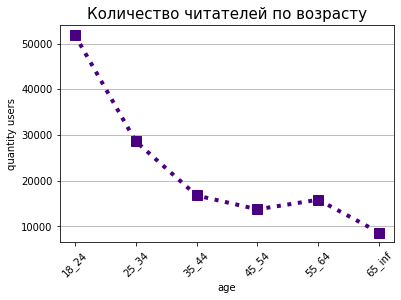

In [14]:
# построим график распределения пользователей по возрасту

quantity_users_age.plot(linestyle=':',
                        linewidth=4,
                        marker='s',
                        markersize=10,
                        color='indigo',
                        legend=None,
                        rot=45)

plt.title('Количество читателей по возрасту', fontsize=15)
plt.ylabel('quantity users')
plt.grid(axis='y')

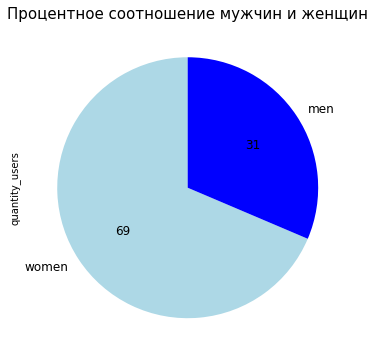

In [15]:
# построим график процентного соотношения мужчин и женщин среди читателей

quantity_users_sex.plot.pie(y='quantity_users',
                            autopct='%.0f',
                            labels=['women','men'],
                            colors=['lightblue','blue'],
                            fontsize=12,
                            figsize=(6,6),
                            legend=None,
                            startangle=90)
plt.title('Процентное соотношение мужчин и женщин', fontsize=15)
plt.grid()

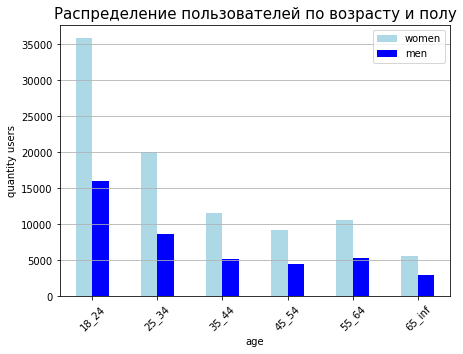

In [16]:
# построим совместный график распределения пользователей по возрасту и полу

quantity_users_age_sex.plot.bar(label=['women','men'],
                                color=['lightblue','blue'],
                                figsize=(7,5),
                                rot=45)
plt.legend(loc='upper right')
plt.title('Распределение пользователей по возрасту и полу', fontsize=15)
plt.ylabel('quantity users')
plt.grid(axis='y')

In [17]:
# для следующего графика переиндексируем строки в датафрейме

unique_users_year = unique_users_year.reset_index()
unique_users_year

,start_year,user_id
0,2018,131320
1,2019,129745


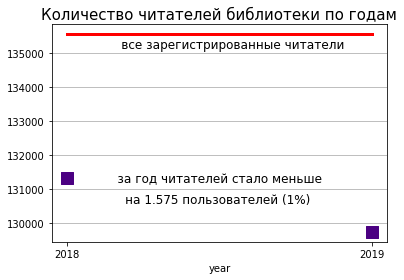

In [18]:
# построим график количества читателей библиотеки по годам

plt.scatter(['2018', '2019'], unique_users_year['user_id'],
            s=150,
            marker='s',
            color='indigo')

# добавим линию с общим количеством зарегистрированных читателей (их 135.553)
u_u = df_data_all['user_id'].nunique()

plt.plot(['2018', '2019'], [u_u, u_u],
        color='red',
        linewidth=3)

# добавим комментарии к графику
plt.text('2018', 135150, '              все зарегистрированные читатели', fontsize=12)
plt.text('2018', 131200, '             за год читателей стало меньше', fontsize=12)
plt.text('2018', 130600, '               на 1.575 пользователей (1%)', fontsize=12)

plt.title('Количество читателей библиотеки по годам', fontsize=15)
plt.xlabel('year')
plt.grid(axis='y')

Обратимся к книгам: выявим самые читаемые жанры; определим книги и авторов, которые пишут в этих жанрах; посмотрим, каким группам читателей они наиболее интересны.

In [19]:
# создадим датафрейм жанров

df_data_genres = df_data_all.drop(['user_id','item_id','progress','rating','start_date','title','authors_all','year','age','age_group','sex_all','start_year','start_month'], axis=1)
df_data_genres.head(2)

,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,Project-менеджмент,Автомобили и ПДД,Автотранспорт,Агрохимия,Адвокатура,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# сохраним данные в csv-файл

df_data_genres.to_csv('data_genres.csv', index=False)

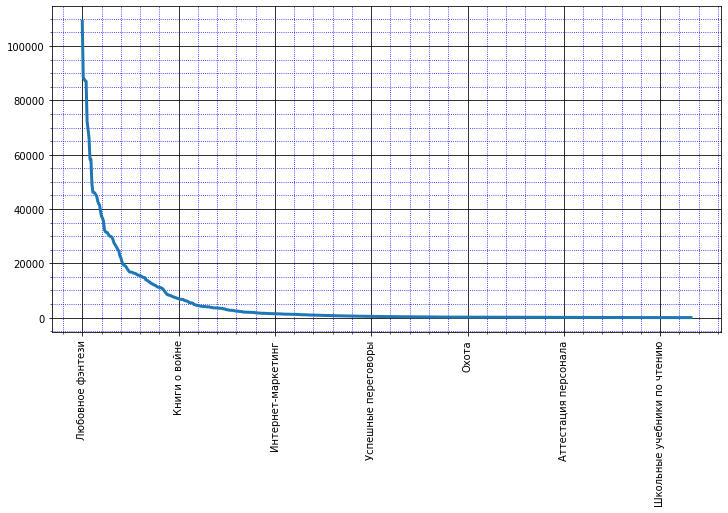

In [21]:
# посмотрим на общую читаемость жанров

df_data_genres.sum()\
    .sort_values(ascending=False)\
    .plot(linewidth=3, figsize=(12,6), x_compat=True, rot=90)

plt.grid(which='major', color='k')

# добавим вспомогательную сетку, предварительно включив второстепенные деления
plt.minorticks_on()
plt.grid(which='minor', color='b', linestyle=':')

Согласно графику, значимый рост числа прочтений начинается с отметки 20.000.

In [22]:
# выделим в отдельный датафрейм жанры, прочитанные более 20.000 раз
# (воспользуемся ранее написанной функцией)

df_data_genres_20000 = model_dataframe(df_data_genres, 20000)
df_data_genres_20000

,Биографии и мемуары,Боевая фантастика,Боевое фэнтези,Газеты,Героическое фэнтези,Городское фэнтези,Журнальные издания,Зарубежная классика,Зарубежная психология,Зарубежная фантастика,...,Саморазвитие / личностный рост,Современная зарубежная литература,Современная русская литература,Современные детективы,Современные любовные романы,Социальная фантастика,Триллеры,Эзотерика / оккультизм,Эротические романы,Юмористическое фэнтези
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398876,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1398877,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1398878,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1398879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [23]:
# посмотрим на названия этих жанров

df_data_genres_20000.columns

Index(['Биографии и мемуары', 'Боевая фантастика', 'Боевое фэнтези', 'Газеты',
       'Героическое фэнтези', 'Городское фэнтези', 'Журнальные издания',
       'Зарубежная классика', 'Зарубежная психология', 'Зарубежная фантастика',
       'Зарубежное фэнтези', 'Зарубежные детективы',
       'Зарубежные любовные романы', 'Здоровье', 'Иронические детективы',
       'Историческая фантастика', 'Книги о приключениях',
       'Книги про волшебников', 'Короткие любовные романы',
       'Космическая фантастика', 'Литература 19 века', 'Литература 20 века',
       'Любовное фэнтези', 'Магические академии', 'Мистика',
       'Научная фантастика', 'Общая история', 'Остросюжетные любовные романы',
       'Полицейские детективы', 'Попаданцы', 'Публицистика',
       'Русская классика', 'Саморазвитие / личностный рост',
       'Современная зарубежная литература', 'Современная русская литература',
       'Современные детективы', 'Современные любовные романы',
       'Социальная фантастика', 'Триллеры',

In [24]:
# из итогового сводного файла создадим новый датафрейм с 42-мя самыми читаемыми жанрами

columns = ['user_id','item_id','progress','rating','title','authors_all','year','age','age_group','sex_all','start_year','start_month']

df_data_all_42best_genres = df_data_all[[x for x in columns] + [y for y in df_data_genres_20000.columns]]

df_data_all_42best_genres

,user_id,item_id,progress,rating,title,authors_all,year,age,age_group,sex_all,...,Саморазвитие / личностный рост,Современная зарубежная литература,Современная русская литература,Современные детективы,Современные любовные романы,Социальная фантастика,Триллеры,Эзотерика / оккультизм,Эротические романы,Юмористическое фэнтези
0,126706,14433,80,NaN,Девятный Спас,Анатолий Брусникин,2007,25_34,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,127290,140952,58,NaN,Алмаз в воровскую корону,Евгений Сухов,2006,25_34,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,46791,83486,23,5.0,Идеальная талия для вашего типа фигуры,Ванесса Томпсон,2003,18_24,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,79313,188770,88,5.0,Стихотворения,Игорь Северянин,не указан,55_64,5.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,63454,78434,87,NaN,Рай со свистом пуль,Сергей Зверев,2012,25_34,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398876,76968,285394,95,NaN,Хитрость,Ги де Мопассан,не указан,55_64,5.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1398877,153877,285394,76,5.0,Хитрость,Ги де Мопассан,не указан,65_inf,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1398878,90021,73789,97,NaN,Дикая охота,Роман Афанасьев,2014,45_54,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1398879,6452,77993,39,NaN,Новогодние детективные истории (сборник),"Мария Брикер,Наталья Александрова,Анна и Серге...",2018,55_64,5.0,1.0,...,0,0,0,1,0,0,0,0,0,0


In [25]:
# сохраним данные в csv-файл

df_data_all_42best_genres.to_csv('data_all_42best_genres.csv', index=False)

In [2]:
# прочитаем последний сохраненный csv-файл

df_data_all_42best_genres = pd.read_csv('data_all_42best_genres.csv')
df_data_all_42best_genres.head(3)

,user_id,item_id,progress,rating,title,authors_all,year,age,age_group,sex_all,...,Саморазвитие / личностный рост,Современная зарубежная литература,Современная русская литература,Современные детективы,Современные любовные романы,Социальная фантастика,Триллеры,Эзотерика / оккультизм,Эротические романы,Юмористическое фэнтези
0,126706,14433,80,NaN,Девятный Спас,Анатолий Брусникин,2007,25_34,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,127290,140952,58,NaN,Алмаз в воровскую корону,Евгений Сухов,2006,25_34,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,46791,83486,23,5.0,Идеальная талия для вашего типа фигуры,Ванесса Томпсон,2003,18_24,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# выделим в отдельный датафрейм возраст пользователей и жанры

df_data_all_42best_genres_age = df_data_all_42best_genres.drop(['user_id','item_id','progress','rating','title','authors_all','year','age_group','sex_all','start_year','start_month'], axis=1)

df_data_all_42best_genres_age.head(3)

,age,Биографии и мемуары,Боевая фантастика,Боевое фэнтези,Газеты,Героическое фэнтези,Городское фэнтези,Журнальные издания,Зарубежная классика,Зарубежная психология,...,Саморазвитие / личностный рост,Современная зарубежная литература,Современная русская литература,Современные детективы,Современные любовные романы,Социальная фантастика,Триллеры,Эзотерика / оккультизм,Эротические романы,Юмористическое фэнтези
0,25_34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25_34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18_24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# сгруппируем данные по возрасту

df_data_all_42_age = df_data_all_42best_genres_age\
                    .groupby('age')\
                    .sum()
df_data_all_42_age

,Биографии и мемуары,Боевая фантастика,Боевое фэнтези,Газеты,Героическое фэнтези,Городское фэнтези,Журнальные издания,Зарубежная классика,Зарубежная психология,Зарубежная фантастика,...,Саморазвитие / личностный рост,Современная зарубежная литература,Современная русская литература,Современные детективы,Современные любовные романы,Социальная фантастика,Триллеры,Эзотерика / оккультизм,Эротические романы,Юмористическое фэнтези
age,,,,,,,,,,,,,,,,,,,,,
18_24,13395,17905,16070,10949,19333,8218,10581,11520,17564,8237,...,25426,11218,26377,22489,30597,8588,13492,10739,16155,8090
25_34,7645,13369,11669,6393,14215,5855,6049,6555,8377,4974,...,12699,6704,17059,16487,18197,5334,9026,5686,10012,5855
35_44,4558,9837,8012,3786,10247,4087,3530,4039,4594,3219,...,6941,4268,11554,11633,11589,3332,6472,3365,6614,4279
45_54,3851,10017,7385,3229,9373,3609,3449,3340,3394,2746,...,5263,3327,10573,10583,8359,2927,5304,2461,4147,3848
55_64,4623,12391,9934,3631,12715,4950,3541,3784,3411,3456,...,5398,4382,14065,15412,12247,3566,7239,2722,6172,5336
65_inf,2625,5974,5244,3412,6558,2783,2709,2095,1680,1897,...,2644,2511,8943,10615,6812,1990,3718,1314,3100,2803


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

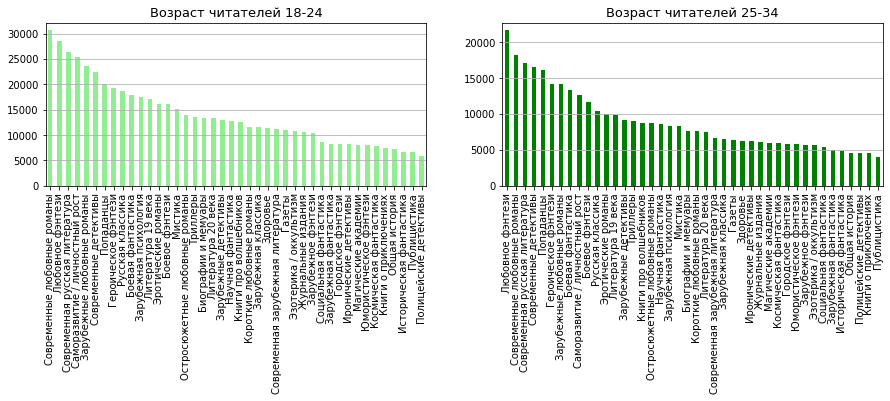

In [6]:
# построим графики со "смежными" возрастными категориями
# (посмотрим, совпадут ли предпочтения)

plt.figure(figsize=(15,3))

plt.subplot(1, 2, 1)
df_data_all_42_age.iloc[0,0:]\
        .sort_values(ascending=False)\
        .plot.bar(legend=None, rot=90, color='lightgreen')
plt.title('Возраст читателей 18-24', fontsize=13)
plt.grid(axis='y')

plt.subplot(1, 2, 2)
df_data_all_42_age.iloc[1,0:]\
        .sort_values(ascending=False)\
        .plot.bar(legend=None, rot=90, color='green')
plt.title('Возраст читателей 25-34', fontsize=13)
plt.grid(axis='y')

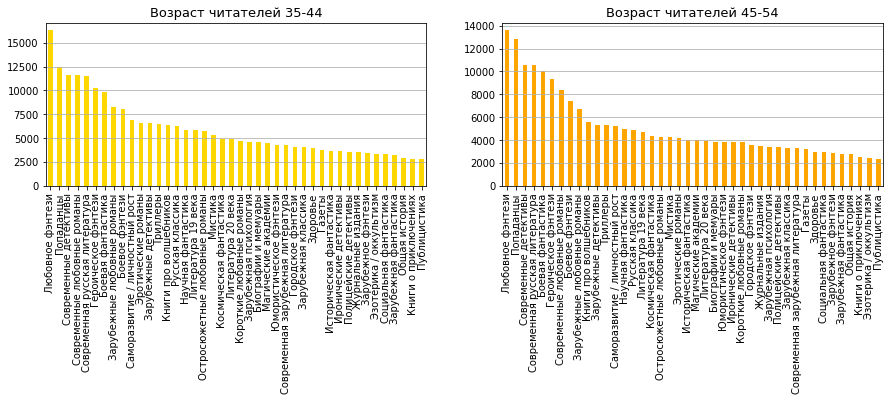

In [7]:
# графики двух следующих возрастных групп

plt.figure(figsize=(15,3))

plt.subplot(1, 2, 1)
df_data_all_42_age.iloc[2,0:]\
        .sort_values(ascending=False)\
        .plot.bar(legend=None, rot=90, color='gold')
plt.title('Возраст читателей 35-44', fontsize=13)
plt.grid(axis='y')

plt.subplot(1, 2, 2)
df_data_all_42_age.iloc[3,0:]\
        .sort_values(ascending=False)\
        .plot.bar(legend=None, rot=90, color='orange')
plt.title('Возраст читателей 45-54', fontsize=13)
plt.grid(axis='y')

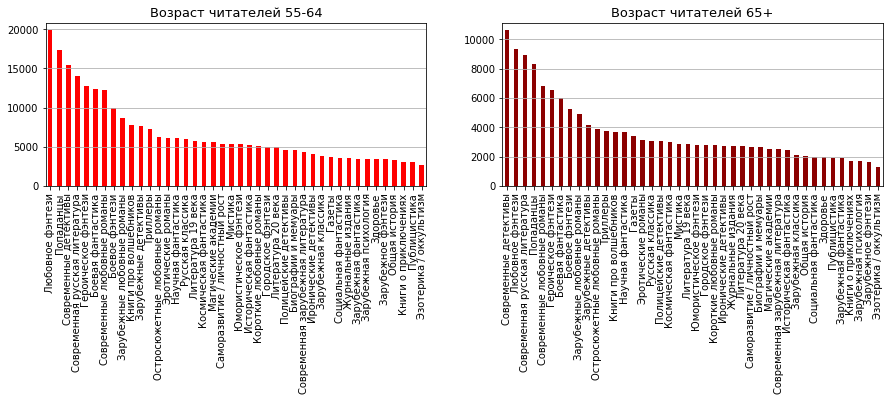

In [8]:
# графики старшей возрастной группы

plt.figure(figsize=(15,3))

plt.subplot(1, 2, 1)
df_data_all_42_age.iloc[4,0:]\
        .sort_values(ascending=False)\
        .plot.bar(legend=None, rot=90, color='red')
plt.title('Возраст читателей 55-64', fontsize=13)
plt.grid(axis='y')

plt.subplot(1, 2, 2)
df_data_all_42_age.iloc[5,0:]\
        .sort_values(ascending=False)\
        .plot.bar(legend=None, rot=90, color='darkred')
plt.title('Возраст читателей 65+', fontsize=13)
plt.grid(axis='y')

In [9]:
# сведем в одну таблицу топ-10 жанров суммарно по всем возрастам

top_10_genres_age = pd.DataFrame([
    ['современные любовные романы','V','V','V','V','V','V'],
    ['любовное фэнтези','V','V','V','V','V','V'],
    ['современная русская литература','V','V','V','V','V','V'],
    ['саморазвитие/личностный рост','V','V','V','-','-','-'],
    ['зарубежные любовные романы','V','V','V','V','V','V'],
    ['современные детективы','V','V','V','V','V','V'],
    ['попаданцы','V','V','V','V','V','V'],
    ['боевая фантастика','V','V','V','V','V','V'],
    ['героическое фэнтези','V','V','V','V','V','V'],
    ['русская классика','V','-','-','-','-','-'],
    ['боевое фэнтези','-','V','V','V','V','V'],
    ['книги про волшебников','-','-','-','V','V','-'],
    ['зарубежные детективы','-','-','-','-','-','V']
    ],
    columns=['genres','18-24','25-34','35-44','45-54','55-64','65+']
)
# top_10_genres_age = top_10_genres_age.set_index('genres')
top_10_genres_age

,genres,18-24,25-34,35-44,45-54,55-64,65+
0,современные любовные романы,V,V,V,V,V,V
1,любовное фэнтези,V,V,V,V,V,V
2,современная русская литература,V,V,V,V,V,V
3,саморазвитие/личностный рост,V,V,V,-,-,-
4,зарубежные любовные романы,V,V,V,V,V,V
5,современные детективы,V,V,V,V,V,V
6,попаданцы,V,V,V,V,V,V
7,боевая фантастика,V,V,V,V,V,V
8,героическое фэнтези,V,V,V,V,V,V
9,русская классика,V,-,-,-,-,-


8 из 10 самых читаемых жанров в каждой группе - 

'Современные любовные романы', 'Любовное фэнтези', 'Зарубежные любовные романы',

'Современная русская литература', 'Современные детективы',

'Попаданцы', 'Боевая фантастика', 'Героическое фэнтези' -

не зависят от возраста (это читают все).

Жанр 'Боевое фэнтези' не попал в первую десятку только у самой молодой группы.

In [10]:
# выделим в отдельный датафрейм жанры и пол пользователей

df_data_all_42best_genres_sex = df_data_all_42best_genres.drop(['user_id','item_id','progress','rating','title','authors_all','year','age','age_group','start_year','start_month'], axis=1)

df_data_all_42best_genres_sex.head(3)

,sex_all,Биографии и мемуары,Боевая фантастика,Боевое фэнтези,Газеты,Героическое фэнтези,Городское фэнтези,Журнальные издания,Зарубежная классика,Зарубежная психология,...,Саморазвитие / личностный рост,Современная зарубежная литература,Современная русская литература,Современные детективы,Современные любовные романы,Социальная фантастика,Триллеры,Эзотерика / оккультизм,Эротические романы,Юмористическое фэнтези
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# сгруппируем данные по полу

df_data_all_42_sex = df_data_all_42best_genres_sex\
                    .groupby('sex_all')\
                    .sum()
df_data_all_42_sex

,Биографии и мемуары,Боевая фантастика,Боевое фэнтези,Газеты,Героическое фэнтези,Городское фэнтези,Журнальные издания,Зарубежная классика,Зарубежная психология,Зарубежная фантастика,...,Саморазвитие / личностный рост,Современная зарубежная литература,Современная русская литература,Современные детективы,Современные любовные романы,Социальная фантастика,Триллеры,Эзотерика / оккультизм,Эротические романы,Юмористическое фэнтези
sex_all,,,,,,,,,,,,,,,,,,,,,
0.0,25408,35080,32969,20556,46530,20915,19595,22518,28714,16043,...,42429,25264,64823,67580,71172,16069,33309,18641,37027,23341
1.0,11289,34413,25345,10844,25911,8587,10264,8815,10306,8486,...,15942,7146,23748,19639,16629,9668,11942,7646,9173,6870


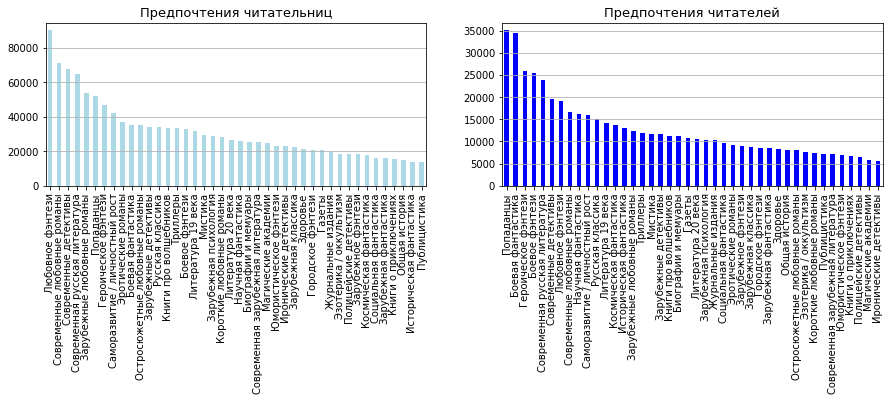

In [12]:
# построим графики по читателям и читательницам
# (посмотрим, насколько здесь совпадут жанровые предпочтения)

plt.figure(figsize=(15,3))

plt.subplot(1, 2, 1)
df_data_all_42_sex.iloc[0,0:]\
        .sort_values(ascending=False)\
        .plot.bar(legend=None, rot=90, color='lightblue')
plt.title('Предпочтения читательниц', fontsize=13)
plt.grid(axis='y')

plt.subplot(1, 2, 2)
df_data_all_42_sex.iloc[1,0:]\
        .sort_values(ascending=False)\
        .plot.bar(legend=None, rot=90, color='blue')
plt.title('Предпочтения читателей', fontsize=13)
plt.grid(axis='y')

In [13]:
# сведем суммарно в одну таблицу топ-10 жанров

top_10_genres_sex = pd.DataFrame([
    ['любовное фэнтези','V','V'],
    ['современные любовные романы','V','V'],
    ['современные детективы','V','V'],
    ['современная русская литература','V','V'],
    ['зарубежные любовные романы','V','-'],
    ['попаданцы','V','V'],
    ['героическое фэнтези','V','V'],
    ['саморазвитие/личностный рост','V','V'],
    ['эротические романы', 'V', '-'],
    ['боевая фантастика','V','V'],
    ['боевое фэнтези','-','V'],
    ['научная фантастика','-','V'],
    ],
    columns=['genres','women','men']
)
# top_10_genres_sex = top_10_genres_sex.set_index('genres')
top_10_genres_sex

,genres,women,men
0,любовное фэнтези,V,V
1,современные любовные романы,V,V
2,современные детективы,V,V
3,современная русская литература,V,V
4,зарубежные любовные романы,V,-
5,попаданцы,V,V
6,героическое фэнтези,V,V
7,саморазвитие/личностный рост,V,V
8,эротические романы,V,-
9,боевая фантастика,V,V


In [14]:
# объединим два датафрейма для получения общего списка популярных жанров

genres_age_sex = top_10_genres_age.merge(top_10_genres_sex, left_on='genres', right_on='genres', how='outer')
genres_age_sex = genres_age_sex.fillna('-')
genres_age_sex

,genres,18-24,25-34,35-44,45-54,55-64,65+,women,men
0,современные любовные романы,V,V,V,V,V,V,V,V
1,любовное фэнтези,V,V,V,V,V,V,V,V
2,современная русская литература,V,V,V,V,V,V,V,V
3,саморазвитие/личностный рост,V,V,V,-,-,-,V,V
4,зарубежные любовные романы,V,V,V,V,V,V,V,-
5,современные детективы,V,V,V,V,V,V,V,V
6,попаданцы,V,V,V,V,V,V,V,V
7,боевая фантастика,V,V,V,V,V,V,V,V
8,героическое фэнтези,V,V,V,V,V,V,V,V
9,русская классика,V,-,-,-,-,-,-,-


Из 15-ти жанров, которые суммарно попали в топ-10 самых читаемых, дальше будем рассматривать только 9 из них.

По 6-ти жанрам определять популярных авторов не станем:
- "саморазвитие/личностный рост" - данный жанр интересен только половине возрастных групп,
- "русская классика" - популярна у читателей только до 25 лет,
- "книги про волшебников" - читает 1/5 всей аудитории,
- "зарубежные детективы", "эротические романы" и "научная фантастика" - интересны отдельным категориям читателей.

В библиотеке МТС есть абонемент "пресса", куда включены различные газеты и журналы. Примечательно, что эти издания пользуются спросом - они вошли в список 42-х самых читаемых жанров.

Посмотрим, какие возрастные группы активно читают периодические издания.

In [15]:
# для построения графика выделим данные по "прессе" в отдельный датафрейм

df_data_all_age_pressa = df_data_all_42_age[['Газеты', 'Журнальные издания']]
df_data_all_age_pressa

,Газеты,Журнальные издания
age,,
18_24,10949,10581
25_34,6393,6049
35_44,3786,3530
45_54,3229,3449
55_64,3631,3541
65_inf,3412,2709


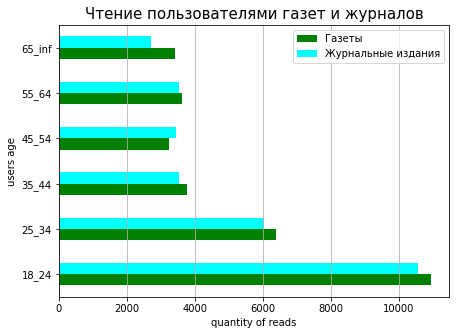

In [16]:
# построим по "прессе" график

df_data_all_age_pressa.plot.barh(figsize=(7,5),
                                color=['green','cyan'])
plt.legend()
plt.title('Чтение пользователями газет и журналов', fontsize=15)
plt.xlabel('quantity of reads')
plt.ylabel('users age')
plt.grid(axis='x')

Периодические издания, как оказалось, интересны всем, причем пользовательский спрос пропорционален количеству самих читателей. Посмотрим, какие издания читают чаще других.

In [17]:
# сформируем датафрейм по газетам

df_data_all_newspaper = df_data_all_42best_genres.loc[df_data_all_42best_genres['Газеты'] == 1]
df_data_all_newspaper = df_data_all_newspaper[['item_id','title','age','sex_all','Газеты']]
df_data_all_newspaper

,item_id,title,age,sex_all,Газеты
43,285667,Спорт-экспресс 198-2019,18_24,0.0,1
54,269175,Сабрина 12-2019,65_inf,0.0,1
66,258019,Комсомольская правда 47т-2012,18_24,0.0,1
92,216463,Твой день 211-2015,18_24,0.0,1
140,257663,Interest-crossword 15-2017,25_34,1.0,1
...,...,...,...,...,...
1398728,282951,Твой день 215-2014,18_24,1.0,1
1398741,88254,Известия 20-2019,18_24,0.0,1
1398840,155624,Интерес-кроссворд 38-2017,55_64,1.0,1
1398846,92946,Интерес-кроссворд 46-2017,25_34,0.0,1


In [18]:
# получим названия газет с помощью регулярных выражений,
# создадим паттерн для "очистки" названий

import re
pattern = r'[а-яёА-ЯЁa-zA-Z\s\.\,\:\!\?\(\)\'\-\|\/\\\+]+\s'

In [19]:
# поместим названия в кавычки (для работы модуля re)

df_data_all_newspaper.update('"' + df_data_all_newspaper['title'] + '"')
df_data_all_newspaper.head(3)

,item_id,title,age,sex_all,Газеты
43,285667,"""Спорт-экспресс 198-2019""",18_24,0.0,1
54,269175,"""Сабрина 12-2019""",65_inf,0.0,1
66,258019,"""Комсомольская правда 47т-2012""",18_24,0.0,1


In [20]:
# запишем в новый столбец "очищенные" значения

df_data_all_newspaper['издания'] = df_data_all_newspaper['title'].map(lambda x: re.findall(pattern, x))
df_data_all_newspaper.head(3)

,item_id,title,age,sex_all,Газеты,издания
43,285667,"""Спорт-экспресс 198-2019""",18_24,0.0,1,[Спорт-экспресс ]
54,269175,"""Сабрина 12-2019""",65_inf,0.0,1,[Сабрина ]
66,258019,"""Комсомольская правда 47т-2012""",18_24,0.0,1,[Комсомольская правда ]


In [21]:
# преобразуем строки-списки в обычные строки и запишем названия большими буквами
# (для унификации значений)

df_data_all_newspaper.update(df_data_all_newspaper['издания'].astype(str).str.replace('\[|\]',''))
df_data_all_newspaper['издания'] = df_data_all_newspaper['издания'].str.upper()
df_data_all_newspaper.head(3)

,item_id,title,age,sex_all,Газеты,издания
43,285667,"""Спорт-экспресс 198-2019""",18_24,0.0,1,'СПОРТ-ЭКСПРЕСС '
54,269175,"""Сабрина 12-2019""",65_inf,0.0,1,'САБРИНА '
66,258019,"""Комсомольская правда 47т-2012""",18_24,0.0,1,'КОМСОМОЛЬСКАЯ ПРАВДА '


In [22]:
# определим количество уникальных изданий

df_data_all_newspaper['издания'].nunique()

52

In [23]:
# рассчитаем, сколько раз читали каждую газету

paper_group = df_data_all_newspaper.groupby(['издания'])\
                        .count().sort_values(by='Газеты', ascending=False)\
                        .rename(columns={'Газеты':'количество'})[['количество']]
paper_group

,количество
издания,
'ТВОЙ ДЕНЬ ',6469
'НАША ВЕРСИЯ ',2543
'СОВЕТСКИЙ СПОРТ. ФУТБОЛ ',2048
'ИНТЕРЕС-КРОССВОРД ',1833
'МК МОСКОВСКИЙ КОМСОМОЛЕЦ ',1827
'ТАЙНЫ ЗВЕЗД ',1755
'ИЗВЕСТИЯ ',1647
'СОВЕТСКИЙ СПОРТ (ФЕДЕРАЛЬНЫЙ ВЫПУСК) ',1337
'СПОРТ-ЭКСПРЕСС ',1203


In [24]:
# составим список газет, которые прочитали больше 1000 раз (9 изданий)

news_1000 = ["'ТВОЙ ДЕНЬ '","'НАША ВЕРСИЯ '","'СОВЕТСКИЙ СПОРТ. ФУТБОЛ '","'ИНТЕРЕС-КРОССВОРД '","'МК МОСКОВСКИЙ КОМСОМОЛЕЦ '","'ТАЙНЫ ЗВЕЗД '","'ИЗВЕСТИЯ '","'СОВЕТСКИЙ СПОРТ (ФЕДЕРАЛЬНЫЙ ВЫПУСК) '","'СПОРТ-ЭКСПРЕСС '"]

In [25]:
# выделим в отдельный датафрейм данные по самым читаемым газетам и читателям-женщинам

paper_group_women = df_data_all_newspaper\
        .loc[(df_data_all_newspaper['издания'].isin(news_1000)) & (df_data_all_newspaper['sex_all']==0)]
paper_group_women

,item_id,title,age,sex_all,Газеты,издания
43,285667,"""Спорт-экспресс 198-2019""",18_24,0.0,1,'СПОРТ-ЭКСПРЕСС '
92,216463,"""Твой день 211-2015""",18_24,0.0,1,'ТВОЙ ДЕНЬ '
404,315424,"""Твой день 190-2014""",18_24,0.0,1,'ТВОЙ ДЕНЬ '
426,114938,"""Советский Спорт. Футбол 40""",55_64,0.0,1,'СОВЕТСКИЙ СПОРТ. ФУТБОЛ '
690,142279,"""Наша версия 35-2014""",18_24,0.0,1,'НАША ВЕРСИЯ '
...,...,...,...,...,...,...
1398556,302369,"""Советский Спорт. Футбол 49""",18_24,0.0,1,'СОВЕТСКИЙ СПОРТ. ФУТБОЛ '
1398618,209974,"""Советский Спорт (Федеральный выпуск) 193-2019""",55_64,0.0,1,'СОВЕТСКИЙ СПОРТ (ФЕДЕРАЛЬНЫЙ ВЫПУСК) '
1398628,164672,"""Известия 54-2017""",18_24,0.0,1,'ИЗВЕСТИЯ '
1398741,88254,"""Известия 20-2019""",18_24,0.0,1,'ИЗВЕСТИЯ '


In [26]:
# сгруппируем значения по возрасту

paper_women_1000 = paper_group_women.groupby(['издания','age'])\
                    .count().rename(columns={'Газеты': 'quantity'})[['quantity']]
paper_women_1000

quantity
издания                                 age             
'ИЗВЕСТИЯ '                             18_24        385
                                        25_34        242
                                        35_44        112
                                        45_54        119
                                        55_64        133
                                        65_inf        89
'ИНТЕРЕС-КРОССВОРД '                    18_24        474
                                        25_34        254
                                        35_44        156
                                        45_54        121
                                        55_64        116
                                        65_inf        65
'МК МОСКОВСКИЙ КОМСОМОЛЕЦ '             18_24        472
                                        25_34        243
                                        35_44        143
                                        45_54        167
                                        55_64        140
                                        65_inf        87
'НАША ВЕРСИЯ '                          18_24        580
                                        25_34        354
                                        35_44        212
                                        45_54        153
                                        55_64        183
                                        65_inf        91
'СОВЕТСКИЙ СПОРТ (ФЕДЕРАЛЬНЫЙ ВЫПУСК) ' 18_24        329
                                        25_34        182
                                        35_44        105
                                        45_54        118
                                        55_64        106
                                        65_inf        50
'СОВЕТСКИЙ СПОРТ. ФУТБОЛ '              18_24        488
                                        25_34        289
                                        35_44        168
                                        45_54        134
                                        55_64        154
                                        65_inf        93
'СПОРТ-ЭКСПРЕСС '                       18_24        294
                                        25_34        172
                                        35_44         96
                                        45_54         87
                                        55_64        102
                                        65_inf        40
'ТАЙНЫ ЗВЕЗД '                          18_24        394
                                        25_34        247
                                        35_44        147
                                        45_54        105
                                        55_64        164
                                        65_inf        74
'ТВОЙ ДЕНЬ '                            18_24       1603
                                        25_34        892
                                        35_44        513
                                        45_54        418
                                        55_64        455
                                        65_inf       245

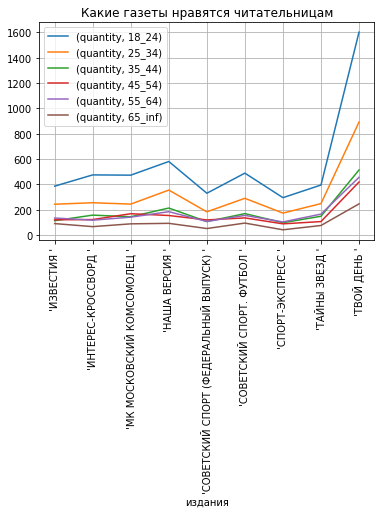

In [27]:
# построим график

paper_women_1000.unstack('age').plot(rot=90)
plt.title('Какие газеты нравятся читательницам')
plt.legend()
plt.grid()

In [28]:
# теперь посмотрим на предпочтения читателей:
# выделим в отдельный датафрейм данные по самым читаемым газетам и читателям-мужчинам

paper_group_men = df_data_all_newspaper\
        .loc[(df_data_all_newspaper['издания'].isin(news_1000)) & (df_data_all_newspaper['sex_all']==1)]
paper_group_men

,item_id,title,age,sex_all,Газеты,издания
299,212309,"""Тайны Звезд 32-2016""",18_24,1.0,1,'ТАЙНЫ ЗВЕЗД '
334,321216,"""МК Московский Комсомолец 164-2019""",25_34,1.0,1,'МК МОСКОВСКИЙ КОМСОМОЛЕЦ '
358,29763,"""Спорт-экспресс 176-2019""",45_54,1.0,1,'СПОРТ-ЭКСПРЕСС '
541,46183,"""Твой день 133-2015""",18_24,1.0,1,'ТВОЙ ДЕНЬ '
549,259795,"""Спорт-экспресс 260-2019""",45_54,1.0,1,'СПОРТ-ЭКСПРЕСС '
...,...,...,...,...,...,...
1398445,121476,"""Твой день 177-2014""",25_34,1.0,1,'ТВОЙ ДЕНЬ '
1398504,129911,"""Твой день 100-2014""",35_44,1.0,1,'ТВОЙ ДЕНЬ '
1398720,80291,"""Советский Спорт (Федеральный выпуск) 242-2019""",45_54,1.0,1,'СОВЕТСКИЙ СПОРТ (ФЕДЕРАЛЬНЫЙ ВЫПУСК) '
1398728,282951,"""Твой день 215-2014""",18_24,1.0,1,'ТВОЙ ДЕНЬ '


In [29]:
# сгруппируем значения по возрасту

paper_men_1000 = paper_group_men.groupby(['издания','age'])\
                    .count().rename(columns={'Газеты': 'quantity'})[['quantity']]
paper_men_1000

quantity
издания                                 age             
'ИЗВЕСТИЯ '                             18_24        177
                                        25_34        113
                                        35_44         59
                                        45_54         64
                                        55_64         65
                                        65_inf        89
'ИНТЕРЕС-КРОССВОРД '                    18_24        183
                                        25_34        114
                                        35_44         57
                                        45_54         64
                                        55_64         52
                                        65_inf       177
'МК МОСКОВСКИЙ КОМСОМОЛЕЦ '             18_24        207
                                        25_34        103
                                        35_44         87
                                        45_54         55
                                        55_64         75
                                        65_inf        48
'НАША ВЕРСИЯ '                          18_24        273
                                        25_34        165
                                        35_44        116
                                        45_54         71
                                        55_64        108
                                        65_inf       237
'СОВЕТСКИЙ СПОРТ (ФЕДЕРАЛЬНЫЙ ВЫПУСК) ' 18_24        174
                                        25_34         90
                                        35_44         58
                                        45_54         55
                                        55_64         46
                                        65_inf        24
'СОВЕТСКИЙ СПОРТ. ФУТБОЛ '              18_24        209
                                        25_34        107
                                        35_44         61
                                        45_54         72
                                        55_64         68
                                        65_inf       205
'СПОРТ-ЭКСПРЕСС '                       18_24        123
                                        25_34         74
                                        35_44         56
                                        45_54         96
                                        55_64         45
                                        65_inf        18
'ТАЙНЫ ЗВЕЗД '                          18_24        188
                                        25_34        109
                                        35_44         56
                                        45_54         54
                                        55_64         71
                                        65_inf       146
'ТВОЙ ДЕНЬ '                            18_24        672
                                        25_34        372
                                        35_44        245
                                        45_54        166
                                        55_64        237
                                        65_inf       651

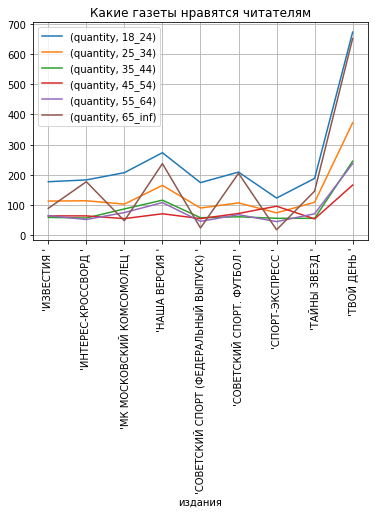

In [30]:
# построим график

paper_men_1000.unstack('age').plot(rot=90)
plt.title('Какие газеты нравятся читателям')
plt.legend()
plt.grid()

Как показали данные 9-ти самых читаемых изданий, мужчины и женщины читают газеты по-разному.

У читательниц график более "ровный", значения пропорциональны количеству самих пользователей.

У читателей-мужчин - другая картина: здесь также самая активная - молодая группа, но вот старшее поколение (от 65 и выше) по ряду изданий приближается к молодежи, обгоняя всех остальных.

Примечательно, что самой читаемой газетой является "Твой день": это ежедневное издание со светской хроникой, шоу-бизнесом, приметами, гаданием и гороскопом.

Проведем аналогичный анализ данных по журнальным изданиям.

In [31]:
# сформируем датафрейм по журналам

df_data_all_journal = df_data_all_42best_genres.loc[df_data_all_42best_genres['Журнальные издания'] == 1]
df_data_all_journal = df_data_all_journal[['item_id','title','age','sex_all','Журнальные издания']]
df_data_all_journal

,item_id,title,age,sex_all,Журнальные издания
64,213283,Профиль 15-2017,25_34,1.0,1
86,250030,Добрые Советы. Люблю Готовить! 09-2018,18_24,1.0,1
161,23606,Men's Health 05-2019,18_24,0.0,1
207,197700,Семь Дней Тв-программа 23-2019,18_24,1.0,1
211,294406,Звезды и Советы 30-2019,18_24,1.0,1
...,...,...,...,...,...
1398686,288560,"Женские Истории. Откровенные, Душевные, Правди...",18_24,0.0,1
1398690,297622,Огонёк 20-2018,18_24,0.0,1
1398732,120537,Все Для Женщины 39-2017,55_64,1.0,1
1398752,261203,Лиза 52-2019,45_54,0.0,1


In [32]:
# поместим названия в кавычки и запишем в новый столбец "очищенные" значения
# (паттерн остается прежним)

df_data_all_journal.update('"' + df_data_all_journal['title'] + '"')

df_data_all_journal['журналы'] = df_data_all_journal['title'].map(lambda x: re.findall(pattern, x))
df_data_all_journal.head(3)

,item_id,title,age,sex_all,Журнальные издания,журналы
64,213283,"""Профиль 15-2017""",25_34,1.0,1,[Профиль ]
86,250030,"""Добрые Советы. Люблю Готовить! 09-2018""",18_24,1.0,1,[Добрые Советы. Люблю Готовить! ]
161,23606,"""Men's Health 05-2019""",18_24,0.0,1,[Men's Health ]


In [33]:
# уберем квадратные скобки и запишем названия журналов большими буквами

df_data_all_journal.update(df_data_all_journal['журналы'].astype(str).str.replace('\[|\]',''))

df_data_all_journal['журналы'] = df_data_all_journal['журналы'].str.upper()
df_data_all_journal.head(3)

,item_id,title,age,sex_all,Журнальные издания,журналы
64,213283,"""Профиль 15-2017""",25_34,1.0,1,'ПРОФИЛЬ '
86,250030,"""Добрые Советы. Люблю Готовить! 09-2018""",18_24,1.0,1,'ДОБРЫЕ СОВЕТЫ. ЛЮБЛЮ ГОТОВИТЬ! '
161,23606,"""Men's Health 05-2019""",18_24,0.0,1,"""MEN'S HEALTH """


In [34]:
# найдем количество уникальных названий журналов

df_data_all_journal['журналы'].nunique()

117

In [35]:
# определим, сколько раз читали каждый журнал

journal_group = df_data_all_journal.groupby(['журналы'])\
                        .count().sort_values(by='title', ascending=False)\
                        .rename(columns={'title':'количество'})[['количество']]
journal_group

,количество
журналы,
'ПРОФИЛЬ ',2000
'ЗВЕЗДЫ И СОВЕТЫ ',1670
'ВСЕ ДЛЯ ЖЕНЩИНЫ ',1582
'СОВЕТСКИЙ СПОРТ. ФУТБОЛ ',1339
'КАРАВАН ИСТОРИЙ ',1124
...,...
'ЖЕЛТАЯ ГАЗЕТА. ТОЛЬКО ЗВЕЗДЫ ',11
'КОТЭЛЛО ',10
'AVTOMIR ',10


In [36]:
# посмотрим на журналы, которые прочитали более 700 раз

journal_group[journal_group['количество'] > 700]

,количество
журналы,
'ПРОФИЛЬ ',2000
'ЗВЕЗДЫ И СОВЕТЫ ',1670
'ВСЕ ДЛЯ ЖЕНЩИНЫ ',1582
'СОВЕТСКИЙ СПОРТ. ФУТБОЛ ',1339
'КАРАВАН ИСТОРИЙ ',1124
"'ВЯЗАНИЕ\XA0', ' ВАШЕ ХОББИ '",1088
'КОММЕРСАНТЪ (ПОНЕДЕЛЬНИК-ПЯТНИЦА) ',1012
'ЛИЗА ',970
"'ЖЕНСКИЕ ИСТОРИИ. ОТКРОВЕННЫЕ, ДУШЕВНЫЕ, ПРАВДИВЫЕ '",877


In [40]:
# заменим на корректное название журнал по вязанию (согласно каталогу)

df_data_all_journal['журналы'].replace("'ВЯЗАНИЕ\XA0', ' ВАШЕ ХОББИ '", "'ВЯЗАНИЕ - ВАШЕ ХОББИ '", inplace=True)

In [41]:
# проверим, повлияло ли это на итоговое количество прочтений

journal_group_1 = df_data_all_journal.groupby(['журналы'])\
                        .count().sort_values(by='title', ascending=False)\
                        .rename(columns={'title':'количество'})[['количество']]

journal_group_1[journal_group_1['количество'] > 700]

,количество
журналы,
'ПРОФИЛЬ ',2000
'ЗВЕЗДЫ И СОВЕТЫ ',1670
'ВСЕ ДЛЯ ЖЕНЩИНЫ ',1582
'СОВЕТСКИЙ СПОРТ. ФУТБОЛ ',1339
'КАРАВАН ИСТОРИЙ ',1124
'ВЯЗАНИЕ - ВАШЕ ХОББИ ',1088
'КОММЕРСАНТЪ (ПОНЕДЕЛЬНИК-ПЯТНИЦА) ',1012
'ЛИЗА ',970
"'ЖЕНСКИЕ ИСТОРИИ. ОТКРОВЕННЫЕ, ДУШЕВНЫЕ, ПРАВДИВЫЕ '",877


In [42]:
# создадим список из первых 10-ти журналов (читали больше 800 раз)

jour_800 = ["'ПРОФИЛЬ '","'ЗВЕЗДЫ И СОВЕТЫ '","'ВСЕ ДЛЯ ЖЕНЩИНЫ '","'СОВЕТСКИЙ СПОРТ. ФУТБОЛ '","'КАРАВАН ИСТОРИЙ '","'ВЯЗАНИЕ - ВАШЕ ХОББИ '","'КОММЕРСАНТЪ (ПОНЕДЕЛЬНИК-ПЯТНИЦА) '","'ЛИЗА '","'ЖЕНСКИЕ ИСТОРИИ. ОТКРОВЕННЫЕ, ДУШЕВНЫЕ, ПРАВДИВЫЕ '","'PLAYBOY '"]

In [ ]:
#

In [ ]:
#

In [ ]:
#

In [ ]:
#

In [ ]:
#

In [ ]:
#

In [ ]:
#

In [ ]:
#

In [ ]:
# def model_dataframe (df, number):
    # model_number = pd.DataFrame()

    # for column in df.columns:
       # if df[column].sum() > number:
         #   model_number[column] = df[column]
    # return model_number

In [ ]:
#